In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore')
print("Libraries imported successfully.")

Libraries imported successfully.


In [90]:
# Chargement du dataset
df = pd.read_csv('tayara_cars_all_pages.csv')

print("Shape du dataset:", df.shape)
print("\n" + "="*80)
df.head(10)

Shape du dataset: (7178, 17)



,titre,prix,kilometrage,couleur_du_vehicule,etat_du_vehicule,boite,annee,cylindree,marque,modele,puissance_fiscale,type_de_carrosserie,carburant,description,url,location,posting_time
0,"Suzuki Celerio, première main",31000.0,53000,Bleu,NaN,Manuelle,2019.0,NaN,Suzuki,Celerio,4.0,Compacte,Essence,"Suzuki Celerio à vendre première main, Faible ...",https://www.tayara.tn/item/voitures/tunis/tuni...,tunis,"12:53, 30/11/2025"
1,Toyota Corolla Dynamic – 2021 – 49 900 km – Ex...,73000.0,49900,Noir,Avec kilométrage,Automatique,2021.0,1.2L,Toyota,Corolla verso,6.0,Compacte,Essence,Je vends ma Toyota Corolla Hatchback – finitio...,https://www.tayara.tn/item/voitures/ariana/la-...,Ariana,"13:53, 28/11/2025"
2,BMW Série 3 F30 316i 2014,NaN,170,Blanc,Nouveau,Manuelle,2014.0,1.6L,BMW,Serie 3 GT,7.0,Berline,Essence,Je mets en vente ma BMW F30 316i (2014) Essenc...,https://www.tayara.tn/item/voitures/ariana/les...,Ariana,"13:53, 27/11/2025"
3,Bmw F30,52500.0,170,Blanc,Avec kilométrage,Manuelle,2014.0,1.6L,BMW,Serie 3,7.0,Berline,Essence,À VENDRE : BMW F30 316i – 2014 (Sport Line) Es...,https://www.tayara.tn/item/voitures/ariana/les...,Ariana,"13:53, 27/11/2025"
4,voiture Peugeot 3008 à vendre,1111.0,2202021,Bleu,Avec kilométrage,Automatique,2021.0,1.2L,Peugeot,3008,7.0,Autres,Essence,"particulier ,je mets une très belle Peugeot 30...",https://www.tayara.tn/item/voitures/nabeul/ham...,Nabeul,"13:53, 27/11/2025"
5,ford titanium sport 1ère main,52000.0,119000,Bleu,Nouveau,Automatique,2021.0,<1.0L,Ford,Super Duty,7.0,Berline,Essence,⛔Possibilité de Vente ou Echange⛔ 📞 Contact🚗 F...,https://www.tayara.tn/item/voitures/ariana/ari...,Ariana,"13:53, 26/11/2025"
6,Kia Koup en parfait état,28000.0,200000,Gris,Avec kilométrage,Manuelle,2010.0,1.6L,Kia,Cerato,7.0,Berline,Essence,NaN,https://www.tayara.tn/item/voitures/ariana/jar...,Ariana,"13:53, 25/11/2025"
7,Porsche Panamera V6 – Série 220 – Année 2010,160000.0,76000,Noir,Avec kilométrage,Automatique,2010.0,3.5L,Porsche,Panamera,20.0,Berline,Essence,📍 Tunis – 78.000 km – Entretien Porsche Détail...,https://www.tayara.tn/item/voitures/tunis/la-m...,Tunis,"13:53, 24/11/2025"
8,hyundai Kona hybride,85000.0,59400,Gris,Avec kilométrage,Manuelle,2022.0,1.6L,Hyundai,Kona,6.0,4 x 4,Hybride essence,Hyundai Kona Hybride – Avril 2022 – 59400 km S...,https://www.tayara.tn/item/voitures/monastir/m...,Monastir,"13:53, 24/11/2025"
9,voiture,37.0,60000,Noir,Avec kilométrage,Manuelle,2019.0,<1.0L,Citroen,C35,4.0,Autres,Essence,voiture Citroën C3 puissance fiscale : 4 CV es...,https://www.tayara.tn/item/voitures/le-kef/taj...,Le Kef,"13:53, 24/11/2025"


In [91]:
# Informations générales sur le dataset
print("Informations sur le dataset:")
print("="*80)
df.info()

Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7178 entries, 0 to 7177
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   titre                7178 non-null   object 
 1   prix                 5543 non-null   float64
 2   kilometrage          6536 non-null   object 
 3   couleur_du_vehicule  6800 non-null   object 
 4   etat_du_vehicule     6466 non-null   object 
 5   boite                6783 non-null   object 
 6   annee                6533 non-null   float64
 7   cylindree            6227 non-null   object 
 8   marque               6761 non-null   object 
 9   modele               6438 non-null   object 
 10  puissance_fiscale    6154 non-null   float64
 11  type_de_carrosserie  6101 non-null   object 
 12  carburant            6736 non-null   object 
 13  description          5669 non-null   object 
 14  url                  7178 non-null   object 
 15  location 

In [92]:
# Statistiques descriptives avec la fonction describe().T
print("Statistiques descriptives:")
print("="*80)
df.describe(include='all')

Statistiques descriptives:


,titre,prix,kilometrage,couleur_du_vehicule,etat_du_vehicule,boite,annee,cylindree,marque,modele,puissance_fiscale,type_de_carrosserie,carburant,description,url,location,posting_time
count,7178,5.543000e+03,6536,6800,6466,6783,6533.000000,6227,6761,6438,6.154000e+03,6101,6736,5669,7178,3096,3096
unique,5449,NaN,1261,18,5,3,NaN,28,60,497,NaN,8,11,5456,7129,36,129
top,Voitures,NaN,200000,Noir,Avec kilométrage,Manuelle,NaN,1.2L,Volkswagen,Clio,NaN,Berline,Essence,Ranger rover 2lL Modèle 2013 200.000 km Diesel...,https://www.tayara.tn/item/voitures/tunis/tuni...,Tunis,"15:05, 05/11/2025"
freq,160,NaN,125,1884,4660,4669,NaN,1392,841,237,NaN,1872,4419,6,2,585,47
mean,NaN,8.223654e+08,NaN,NaN,NaN,NaN,2017.626512,NaN,NaN,NaN,1.805512e+11,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,4.677914e+10,NaN,NaN,NaN,NaN,246.358343,NaN,NaN,NaN,1.416377e+13,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,5.000000e+03,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN,NaN,5.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.250000e+04,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,6.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,5.650000e+04,NaN,NaN,NaN,NaN,2021.000000,NaN,NaN,NaN,8.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
# Séparation des variables numériques et catégoriques
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col != 'prix']

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Variables numériques:")
print(numerical_cols)
print(f"\nNombre de variables numériques: {len(numerical_cols)}")
print("\n" + "="*80)
print("\nVariables catégoriques:")
print(categorical_cols)
print(f"\nNombre de variables catégoriques: {len(categorical_cols)}")

Variables numériques:
['annee', 'puissance_fiscale']

Nombre de variables numériques: 2


Variables catégoriques:
['titre', 'kilometrage', 'couleur_du_vehicule', 'etat_du_vehicule', 'boite', 'cylindree', 'marque', 'modele', 'type_de_carrosserie', 'carburant', 'description', 'url', 'location', 'posting_time']

Nombre de variables catégoriques: 14


In [94]:
# Vérification des valeurs manquantes
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Valeurs_Manquantes': missing_values,
    'Pourcentage': missing_percentage
})

missing_df = missing_df[missing_df['Valeurs_Manquantes'] > 0].sort_values(
    'Valeurs_Manquantes', ascending=False
)

if len(missing_df) > 0:
    print("Valeurs manquantes détectées:")
    print(missing_df)
else:
    print("✓ Aucune valeur manquante détectée dans le dataset!")

Valeurs manquantes détectées:
                     Valeurs_Manquantes  Pourcentage
location                           4082    56.868208
posting_time                       4082    56.868208
prix                               1635    22.777933
description                        1509    21.022569
type_de_carrosserie                1077    15.004179
puissance_fiscale                  1024    14.265812
cylindree                           951    13.248816
modele                              740    10.309278
etat_du_vehicule                    712     9.919198
annee                               645     8.985790
kilometrage                         642     8.943996
carburant                           442     6.157704
marque                              417     5.809418
boite                               395     5.502926
couleur_du_vehicule                 378     5.266091


In [95]:
import re

def extract_prix_from_text_advanced(text):
    """
    Extrait le prix depuis un texte en utilisant des regex
    Version avancée avec plus de patterns pour détecter les prix
    """
    if pd.isna(text) or text == '':
        return None
    
    text = str(text)
    
    # Patterns étendus (du plus spécifique au plus général)
    patterns = [
        # Formats avec DT
        r'(\d{1,3}(?:[,\s]\d{3})+)\s*(?:DT|dt|Dt|dinars?)',
        r'(\d+)\s*(?:DT|dt|Dt|dinars?)',
        
        # Avec mot-clé "prix"
        r'prix[:\s]+(\d{1,3}(?:[,\s]\d{3})+)',
        r'prix[:\s]+(\d+)',
        
        # Avec symboles
        r'(\d{1,3}(?:[,\s]\d{3})+)\s*[€$£]',
        r'(\d+)\s*[€$£]',
        
        # Format "à vendre"
        r'(?:à vendre|vente)[:\s]+(\d{1,3}(?:[,\s]\d{3})+)',
        r'(?:à vendre|vente)[:\s]+(\d+)',
    ]
    
    for pattern in patterns:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            prix_str = match.group(1).replace(',', '').replace(' ', '')
            try:
                prix = float(prix_str)
                # Vérifier que le prix est raisonnable (entre 1000 et 1000000 DT)
                if 1000 <= prix <= 1000000:
                    return prix
            except:
                continue
    
    return None

print("✓ Fonction extract_prix_from_text_advanced définie avec succès!")

✓ Fonction extract_prix_from_text_advanced définie avec succès!


In [96]:
# Vérification et correction des prix par comparaison avec titre et description
def verify_and_correct_prix(row):
    """
    Vérifie si le prix dans la colonne correspond au prix dans le texte.
    Si différence, prend la valeur la plus grande.
    """
    prix_actuel = row['prix']
    
    # Extraire le prix depuis le titre et la description
    prix_from_titre = extract_prix_from_text_advanced(row.get('titre', ''))
    prix_from_description = extract_prix_from_text_advanced(row.get('description', ''))
    
    # Collecter tous les prix trouvés (non None)
    prix_list = [p for p in [prix_actuel, prix_from_titre, prix_from_description] if pd.notna(p)]
    
    if len(prix_list) == 0:
        # Retourner un dictionnaire même si aucun prix n'est trouvé
        return {
            'prix_original': prix_actuel,
            'prix_titre': prix_from_titre,
            'prix_description': prix_from_description,
            'prix_final': prix_actuel,
            'changed': False
        }
    
    # Prendre le prix maximum
    prix_max = max(prix_list)
    
    # Retourner les informations pour logging
    return {
        'prix_original': prix_actuel,
        'prix_titre': prix_from_titre,
        'prix_description': prix_from_description,
        'prix_final': prix_max,
        'changed': prix_max != prix_actuel if pd.notna(prix_actuel) else False
    }

# Appliquer la vérification sur toutes les lignes

results = []
for idx in df.index:
    result = verify_and_correct_prix(df.loc[idx])
    results.append(result)
    
    # Mettre à jour le prix si changement
    if result['changed']:
        df.loc[idx, 'prix'] = result['prix_final']

# Analyser les résultats
corrections = [r for r in results if r['changed']]
total_corrections = len(corrections)

print(f"\n{'='*80}")
print("RÉSUMÉ DE LA VÉRIFICATION")
print(f"{'='*80}")
print(f"Total lignes vérifiées: {len(results)}")
print(f"Prix corrigés: {total_corrections}")
print(f"Taux de correction: {(total_corrections/len(results)*100):.2f}%")


RÉSUMÉ DE LA VÉRIFICATION
Total lignes vérifiées: 7178
Prix corrigés: 73
Taux de correction: 1.02%


In [97]:
# Application de l'extraction de prix depuis les colonnes texte

# Identifier les lignes avec prix manquant
missing_prix_mask = df['prix'].isnull()
missing_count_initial = missing_prix_mask.sum()

print(f"Nombre de prix manquants: {missing_count_initial}")

if missing_count_initial > 0:
    # Colonnes de texte où chercher le prix
    text_columns = ['description', 'titre']
    
    extracted_count = 0
    extracted_details = []
    
    for idx in df[missing_prix_mask].index:
        prix_found = None
        source_col = None
        
        # Chercher dans chaque colonne de texte
        for col in text_columns:
            if col in df.columns:
                prix_found = extract_prix_from_text_advanced(df.loc[idx, col])
                if prix_found is not None:
                    df.loc[idx, 'prix'] = prix_found
                    extracted_count += 1
                    source_col = col
                    extracted_details.append({
                        'index': idx,
                        'prix': prix_found,
                        'source': col,
                        'texte': df.loc[idx, col][:100] + '...'
                    })
                    break
    
    print(f"\n{'='*80}")
    print(f"Résumé de l'extraction:")
    print(f"  Prix extraits avec succès: {extracted_count}")
    print(f"  Prix toujours manquants: {df['prix'].isnull().sum()}")
    print(f"  Taux de récupération: {(extracted_count/missing_count_initial)*100:.2f}%")
else:
    print("✓ Aucun prix manquant à traiter!")

print(f"\n{'='*80}")
print(f"État final:")
print(f"  Total lignes: {len(df)}")
print(f"  Prix disponibles: {df['prix'].notna().sum()}")
print(f"  Prix manquants: {df['prix'].isnull().sum()}")

Nombre de prix manquants: 1635

Résumé de l'extraction:
  Prix extraits avec succès: 20
  Prix toujours manquants: 1615
  Taux de récupération: 1.22%

État final:
  Total lignes: 7178
  Prix disponibles: 5563
  Prix manquants: 1615


In [98]:
# Extraction complète du DataFrame en JSON
print("Extraction complète du DataFrame en JSON...")
print("="*80)

# Exporter le DataFrame complet en JSON
df.to_json('dataset_complet.json', orient='records', indent=2, force_ascii=False)

print(f"✓ Fichier 'dataset_complet.json' créé avec succès!")
print(f"✓ Nombre total d'enregistrements: {len(df)}")
print(f"✓ Nombre de colonnes: {len(df.columns)}")

# Statistiques du fichier
import os
file_size = os.path.getsize('dataset_complet.json')
file_size_mb = file_size / (1024 * 1024)

# Afficher un aperçu (premier enregistrement)
print(f"\n{'-'*80}")
print("Aperçu du premier enregistrement (JSON):")
print("-"*80)
import json
first_record = df.iloc[0].to_dict()
# Convertir les valeurs numpy en types Python natifs
for key, value in first_record.items():
    if pd.isna(value):
        first_record[key] = None
    elif isinstance(value, (np.integer, np.floating)):
        first_record[key] = value.item()

print(json.dumps(first_record, ensure_ascii=False, indent=2))


Extraction complète du DataFrame en JSON...
✓ Fichier 'dataset_complet.json' créé avec succès!
✓ Nombre total d'enregistrements: 7178
✓ Nombre de colonnes: 17

--------------------------------------------------------------------------------
Aperçu du premier enregistrement (JSON):
--------------------------------------------------------------------------------
{
  "titre": "Suzuki Celerio, première main",
  "prix": 31000.0,
  "kilometrage": "53000",
  "couleur_du_vehicule": "Bleu",
  "etat_du_vehicule": null,
  "boite": "Manuelle",
  "annee": 2019.0,
  "cylindree": null,
  "marque": "Suzuki",
  "modele": "Celerio",
  "puissance_fiscale": 4.0,
  "type_de_carrosserie": "Compacte",
  "carburant": "Essence",
  "description": "Suzuki Celerio à vendre première main, Faible kilométrage (53600km), Entretien maison Suzuki,Lire plus",
  "url": "https://www.tayara.tn/item/voitures/tunis/tunis/suzuki-celerio-premire-main/6929c177145e1617cbad8935/",
  "location": "tunis",
  "posting_time": "12:53, 

In [99]:
# Suppression des lignes où le prix est toujours manquant
df.dropna(subset=["prix"], inplace=True)
print(df["prix"].isnull().sum())

0


In [100]:
# Correction des valeurs de prix
print("Correction des valeurs de prix...")
print("="*80)

# Afficher les statistiques AVANT correction
print("AVANT correction:")
print(f"  Prix minimum: {df['prix'].min():,.0f} DT")
print(f"  Prix maximum: {df['prix'].max():,.0f} DT")
print(f"  Nombre de prix = 0: {(df['prix'] == 0).sum()}")
print(f"  Nombre de prix entre 1 et 9,999: {((df['prix'] >= 1) & (df['prix'] <= 9999)).sum()}")
print(f"  Nombre de prix > 1 million: {(df['prix'] > 1_000_000).sum()}")

# 1. Remplacer les prix = 0 par 10,000
count_zero = (df['prix'] == 0).sum()
df.loc[df['prix'] == 0, 'prix'] = 10000

# 2. Corriger les petits prix (1 à 9,999) - on suppose qu'il manque des zéros, multiplier par 1000
small_prices_mask = (df['prix'] >= 1) & (df['prix'] <= 9999)
count_small = small_prices_mask.sum()
df.loc[small_prices_mask, 'prix'] = df.loc[small_prices_mask, 'prix'] * 1000

# 3. Après multiplication, s'assurer que tous les prix sont >= 10,000
below_min_mask = df['prix'] < 10000
count_below_min = below_min_mask.sum()
df.loc[below_min_mask, 'prix'] = 10000

# 4. Plafonner les prix à 1 million
high_prices_mask = df['prix'] > 1_000_000
count_high = high_prices_mask.sum()
df.loc[high_prices_mask, 'prix'] = 1_000_000

# Afficher les statistiques APRÈS correction
print(f"\n{'='*80}")
print("APRÈS correction:")
print(f"  Prix minimum: {df['prix'].min():,.0f} DT")
print(f"  Prix maximum: {df['prix'].max():,.0f} DT")
print(f"  Prix moyen: {df['prix'].mean():,.0f} DT")
print(f"  Prix médiane: {df['prix'].median():,.0f} DT")

print(f"\n{'-'*80}")
print("RÉSUMÉ DES CORRECTIONS:")
print(f"  Prix à 0 corrigés à 10,000: {count_zero}")
print(f"  Petits prix (1-9,999) multipliés par 1000: {count_small}")
print(f"  Prix < 10,000 après multiplication: {count_below_min}")
print(f"  Prix plafonnés à 1 million: {count_high}")
print(f"  Total de corrections: {count_zero + count_small + count_below_min + count_high}")

print(f"\n{'='*80}")
print("✓ Correction des prix terminée!")

Correction des valeurs de prix...
AVANT correction:
  Prix minimum: 2 DT
  Prix maximum: 3,333,333,500,000 DT
  Nombre de prix = 0: 0
  Nombre de prix entre 1 et 9,999: 1484
  Nombre de prix > 1 million: 248

APRÈS correction:
  Prix minimum: 10,000 DT
  Prix maximum: 1,000,000 DT
  Prix moyen: 153,192 DT
  Prix médiane: 45,000 DT

--------------------------------------------------------------------------------
RÉSUMÉ DES CORRECTIONS:
  Prix à 0 corrigés à 10,000: 0
  Petits prix (1-9,999) multipliés par 1000: 1484
  Prix < 10,000 après multiplication: 113
  Prix plafonnés à 1 million: 545
  Total de corrections: 2142

✓ Correction des prix terminée!


In [101]:
# Création du dictionnaire marque-modèle à partir des données existantes
print("Création du dictionnaire marque-modèle...")
print("="*80)

# Créer un dictionnaire {marque: [liste de modèles]}
marque_modele_dict = {}

# Parcourir les lignes où marque et modele sont tous deux non nuls
data_with_both = df[(df['marque'].notna()) & (df['modele'].notna())]

for idx, row in data_with_both.iterrows():
    marque = str(row['marque']).strip().lower()
    modele = str(row['modele']).strip().lower()
    
    if marque not in marque_modele_dict:
        marque_modele_dict[marque] = set()
    marque_modele_dict[marque].add(modele)

# Convertir les sets en listes pour faciliter l'affichage
marque_modele_dict = {marque: list(modeles) for marque, modeles in marque_modele_dict.items()}

print(f"✓ Dictionnaire créé avec {len(marque_modele_dict)} marques")
print(f"✓ Nombre total de combinaisons marque-modèle: {sum(len(modeles) for modeles in marque_modele_dict.values())}")

# Afficher quelques exemples
print(f"\n{'-'*80}")
print("Exemples de marques et leurs modèles (premiers 5):")
for i, (marque, modeles) in enumerate(list(marque_modele_dict.items())[:5]):
    print(f"\n{marque.upper()}:")
    print(f"  Modèles: {', '.join(modeles[:10])}")
    if len(modeles) > 10:
        print(f"  ... et {len(modeles) - 10} autres modèles")

print(f"\n{'='*80}")

Création du dictionnaire marque-modèle...
✓ Dictionnaire créé avec 57 marques
✓ Nombre total de combinaisons marque-modèle: 473

--------------------------------------------------------------------------------
Exemples de marques et leurs modèles (premiers 5):

SUZUKI:
  Modèles: vitara, alto, wagon r, sx4, swift, maruti, celerio, xl7, samurai, baleno

TOYOTA:
  Modèles: avensis, hi ace, corolla verso, lexus, corolla, land cruiser, previa, starlet, yaris, rav 4
  ... et 7 autres modèles

BMW:
  Modèles: m6, x5, m5, serie 3, x3, serie 3 gt, serie 4, serie 1, x1, serie 8
  ... et 11 autres modèles

PEUGEOT:
  Modèles: 5008, 404, 207 cc, boxer, 308 sw, 4008, j9, 106, 508, 407
  ... et 26 autres modèles

FORD:
  Modèles: fusion, f150, escape, maverick, c-max, focus c-max, ecosport, focus, puma, ka
  ... et 8 autres modèles



In [102]:
def extract_marque(text, marque_dict):
    """
    Extrait la marque du véhicule en cherchant dans le texte
    et en comparant avec le dictionnaire des marques connues
    """
    if pd.isna(text) or text == '':
        return None
    
    text = str(text).lower()
    
    # Chercher chaque marque connue dans le texte
    for marque in marque_dict.keys():
        if marque in text:
            return marque
    
    return None


def extract_modele(text, marque, marque_modele_dict):
    """
    Extrait le modèle du véhicule en fonction de la marque
    et du dictionnaire marque-modèle
    """
    if pd.isna(text) or text == '' or pd.isna(marque) or marque == '':
        return None
    
    text = str(text).lower()
    marque_lower = str(marque).strip().lower()
    
    # Si la marque n'existe pas dans le dictionnaire, impossible d'extraire
    if marque_lower not in marque_modele_dict:
        return None
    
    # Chercher chaque modèle de cette marque dans le texte
    modeles = marque_modele_dict[marque_lower]
    
    # Trier les modèles par longueur décroissante pour matcher d'abord les plus spécifiques
    modeles_sorted = sorted(modeles, key=len, reverse=True)
    
    for modele in modeles_sorted:
        if modele in text:
            return modele
    
    return None

print("✓ Fonctions d'extraction marque et modèle créées avec succès!")
print("  - extract_marque()")
print("  - extract_modele()")

✓ Fonctions d'extraction marque et modèle créées avec succès!
  - extract_marque()
  - extract_modele()


In [103]:
# Application de l'extraction marque et modèle
print("Extraction des marques et modèles depuis les champs texte...")
print("="*80)

# Colonnes de texte où chercher les informations
text_columns = ['description', 'titre']

# === EXTRACTION DE LA MARQUE ===
print(f"\n{'-'*80}")
print("Traitement de: marque")
print(f"{'-'*80}")

missing_marque_mask = df['marque'].isnull()
missing_marque_initial = missing_marque_mask.sum()

print(f"  Valeurs manquantes: {missing_marque_initial}")

if missing_marque_initial > 0:
    extracted_marque_count = 0
    
    for idx in df[missing_marque_mask].index:
        marque_found = None
        
        # Chercher dans chaque colonne de texte
        for col in text_columns:
            if col in df.columns:
                marque_found = extract_marque(df.loc[idx, col], marque_modele_dict)
                if marque_found is not None:
                    df.loc[idx, 'marque'] = marque_found
                    extracted_marque_count += 1
                    break
    
    missing_marque_after = df['marque'].isnull().sum()
    recovery_rate_marque = (extracted_marque_count / missing_marque_initial) * 100 if missing_marque_initial > 0 else 0
    
    print(f"  ✓ Extraits: {extracted_marque_count}")
    print(f"  ✓ Restants: {missing_marque_after}")
    print(f"  ✓ Taux de récupération: {recovery_rate_marque:.2f}%")
else:
    print(f"  ✓ Aucune valeur manquante!")

# === EXTRACTION DU MODÈLE ===
print(f"\n{'-'*80}")
print("Traitement de: modele")
print(f"{'-'*80}")

missing_modele_mask = df['modele'].isnull()
missing_modele_initial = missing_modele_mask.sum()

print(f"  Valeurs manquantes: {missing_modele_initial}")

if missing_modele_initial > 0:
    extracted_modele_count = 0
    
    for idx in df[missing_modele_mask].index:
        modele_found = None
        
        # Obtenir la marque de cette ligne (peut être déjà présente ou fraîchement extraite)
        marque_row = df.loc[idx, 'marque']
        
        if pd.notna(marque_row):
            # Chercher dans chaque colonne de texte
            for col in text_columns:
                if col in df.columns:
                    modele_found = extract_modele(df.loc[idx, col], marque_row, marque_modele_dict)
                    if modele_found is not None:
                        df.loc[idx, 'modele'] = modele_found
                        extracted_modele_count += 1
                        break
    
    missing_modele_after = df['modele'].isnull().sum()
    recovery_rate_modele = (extracted_modele_count / missing_modele_initial) * 100 if missing_modele_initial > 0 else 0
    
    print(f"  ✓ Extraits: {extracted_modele_count}")
    print(f"  ✓ Restants: {missing_modele_after}")
    print(f"  ✓ Taux de récupération: {recovery_rate_modele:.2f}%")
else:
    print(f"  ✓ Aucune valeur manquante!")

# Résumé final
print(f"\n{'='*80}")
print("RÉSUMÉ DE L'EXTRACTION MARQUE-MODÈLE")
print(f"{'='*80}")
print(f"Marques extraites: {extracted_marque_count if missing_marque_initial > 0 else 0}")
print(f"Modèles extraits: {extracted_modele_count if missing_modele_initial > 0 else 0}")
print(f"Total: {(extracted_marque_count if missing_marque_initial > 0 else 0) + (extracted_modele_count if missing_modele_initial > 0 else 0)}")
print(f"{'='*80}")

Extraction des marques et modèles depuis les champs texte...

--------------------------------------------------------------------------------
Traitement de: marque
--------------------------------------------------------------------------------
  Valeurs manquantes: 277
  ✓ Extraits: 149
  ✓ Restants: 128
  ✓ Taux de récupération: 53.79%

--------------------------------------------------------------------------------
Traitement de: modele
--------------------------------------------------------------------------------
  Valeurs manquantes: 537
  ✓ Extraits: 177
  ✓ Restants: 360
  ✓ Taux de récupération: 32.96%

RÉSUMÉ DE L'EXTRACTION MARQUE-MODÈLE
Marques extraites: 149
Modèles extraits: 177
Total: 326


In [104]:
def extract_cylindree(text):
    """Extrait la cylindrée (ex: 1.6L, 1600cc, 1600 cm3)"""
    if pd.isna(text) or text == '':
        return None
    
    text = str(text)
    patterns = [
        r'(\d+\.?\d*)\s*(?:L|l|litres?)',  # 1.6L, 1.6 litres
        r'(\d{3,4})\s*(?:cc|cm3|cm³)',     # 1600cc, 1600 cm3
    ]
    
    for pattern in patterns:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            val_str = match.group(1).replace(',', '').replace(' ', '')
            try:
                val = float(val_str)
                # Convertir cc en L si nécessaire
                if val > 50:  # Si > 50, c'est probablement en cc
                    val = val / 1000
                if 0.5 <= val <= 8.0:  # Vérifier plage raisonnable
                    return f"{val}L"
            except:
                continue
    return None


def extract_puissance_fiscale(text):
    """Extrait la puissance fiscale (ex: 7 CV, 7cv)"""
    if pd.isna(text) or text == '':
        return None
    
    text = str(text)
    patterns = [
        r'(\d+)\s*(?:CV|cv|Cv|chevaux)',
        r'puissance[:\s]+(\d+)',
    ]
    
    for pattern in patterns:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            try:
                val = int(match.group(1))
                if 1 <= val <= 30:  # Plage raisonnable pour puissance fiscale
                    return val
            except:
                continue
    return None


def extract_annee(text):
    """Extrait l'année (ex: 2019, année 2019)"""
    if pd.isna(text) or text == '':
        return None
    
    text = str(text)
    patterns = [
        r'(?:année|modèle|model)[\s:]+(\d{4})',
        r'\b(20\d{2})\b',  # Années 2000-2099
        r'\b(19\d{2})\b',  # Années 1900-1999
    ]
    
    for pattern in patterns:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            try:
                val = int(match.group(1))
                if 1990 <= val <= 2026:  # Plage raisonnable
                    return val
            except:
                continue
    return None


def extract_kilometrage(text):
    """Extrait le kilométrage (ex: 50 000 km, 50000km, 50k km)"""
    if pd.isna(text) or text == '':
        return None
    
    text = str(text)
    patterns = [
        r'(\d{1,3}(?:[,\s]\d{3})+)\s*(?:km|KM|kilomètre)',  # 50 000 km
        r'(\d+)\s*(?:km|KM|kilomètre)',                     # 50000 km
        r'(\d+)[kK]\s*(?:km|KM)',                           # 50k km
    ]
    
    for pattern in patterns:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            val_str = match.group(1).replace(',', '').replace(' ', '')
            try:
                val = float(val_str)
                # Si notation 'k', multiplier par 1000
                if 'k' in match.group(0).lower() or 'K' in match.group(0):
                    val = val * 1000
                if 0 <= val <= 1000000:  # Plage raisonnable
                    return int(val)
            except:
                continue
    return None


def extract_carburant(text):
    """Extrait le type de carburant"""
    if pd.isna(text) or text == '':
        return None
    
    text = str(text).lower()
    
    carburants = {
        'essence': ['essence', 'gasoline', 'petrol'],
        'diesel': ['diesel', 'gasoil', 'gazole'],
        'électrique': ['électrique', 'electrique', 'electric', 'ev'],
        'hybride': ['hybride', 'hybrid'],
        'GPL': ['gpl', 'gaz'],
    }
    
    for carburant, keywords in carburants.items():
        for keyword in keywords:
            if keyword in text:
                return carburant
    return None


def extract_boite(text):
    """Extrait le type de boîte de vitesses"""
    if pd.isna(text) or text == '':
        return None
    
    text = str(text).lower()
    
    boites = {
        'Manuelle': ['manuelle', 'manual', 'manuel', 'bvm'],
        'Automatique': ['automatique', 'automatic', 'auto', 'bva', 'cvt'],
        'Semi-automatique': ['semi-automatique', 'semi automatique', 'semi'],
    }
    
    for boite, keywords in boites.items():
        for keyword in keywords:
            if keyword in text:
                return boite
    return None


def extract_couleur(text):
    """Extrait la couleur du véhicule"""
    if pd.isna(text) or text == '':
        return None
    
    text = str(text).lower()
    
    couleurs = {
        'Blanc': ['blanc', 'white', 'blanche'],
        'Noir': ['noir', 'black', 'noire'],
        'Gris': ['gris', 'gray', 'grey', 'grise'],
        'Rouge': ['rouge', 'red'],
        'Bleu': ['bleu', 'blue', 'bleue'],
        'Vert': ['vert', 'green', 'verte'],
        'Jaune': ['jaune', 'yellow'],
        'Orange': ['orange'],
        'Marron': ['marron', 'brown', 'beige'],
        'Argent': ['argent', 'silver', 'argenté'],
        'Or': ['or', 'gold', 'doré'],
    }
    
    for couleur, keywords in couleurs.items():
        for keyword in keywords:
            if keyword in text:
                return couleur
    return None


def extract_etat_vehicule(text):
    """
    Extrait l'état du véhicule et le mappe vers les catégories standardisées:
    - Nouveau
    - Avec kilométrage
    - Non dédouanné
    - RS
    - Pièces manquantes
    """
    if pd.isna(text) or text == '':
        return None
    
    text = str(text).lower()
    
    # Mapping des patterns vers les catégories (ordre important!)
    etats = {
        'Pièces manquantes': ['pièces manquantes', 'pieces manquantes', 'manque pièces', 'manque pieces'],
        'Non dédouanné': ['non dédouanné', 'non dedouanne', 'non douane', 'non dédouané', 'pas dédouanné'],
        'RS': [' rs ', 'rs ', ' rs', 'roulage simple'],
        'Nouveau': ['état neuf', 'etat neuf', 'neuf', 'new', 'état d\'origine', 'etat d\'origine', 'comme neuf'],
        'Avec kilométrage': ['première main', 'premiere main', '1ère main', '1ere main', '1er main', 'premier main',
                             'occasion', 'deuxième main', 'deuxieme main', '2ème main', '2eme main',
                             'utilisé', 'utilise', 'used', 'avec kilométrage', 'avec kilometrage'],
    }
    
    for etat, keywords in etats.items():
        for keyword in keywords:
            if keyword in text:
                return etat
    
    return None


def extract_type_carrosserie(text):
    """
    Extrait le type de carrosserie et le mappe vers les catégories standardisées:
    - Compact
    - Berline
    - Cabriolet
    - 4 x 4
    - Monospace
    - Utilitaire
    - Pick up
    - Autres
    """
    if pd.isna(text) or text == '':
        return None
    
    text = str(text).lower()
    
    # Mapping des patterns vers les catégories (ordre important!)
    types_carrosserie = {
        'Pick up': ['pick up', 'pickup', 'pick-up'],
        'Cabriolet': ['cabriolet', 'convertible', 'décapotable', 'decapotable', 'cabrio'],
        'Monospace': ['monospace', 'minivan', 'van', 'mpv'],
        'Utilitaire': ['utilitaire', 'fourgon', 'camionnette', 'utility'],
        '4 x 4': ['4x4', '4 x 4', 'suv', 'tout terrain', 'tout-terrain', 'crossover', 'jeep'],
        'Berline': ['berline', 'sedan', 'saloon'],
        'Compact': ['compacte', 'compact', 'citadine', 'hatchback', 'petite'],
        'Autres': ['coupé', 'coupe', 'break', 'wagon', 'roadster', 'sportive', 'limousine'],
    }
    
    for type_carrosserie, keywords in types_carrosserie.items():
        for keyword in keywords:
            if keyword in text:
                return type_carrosserie
    
    return None

print("✓ Toutes les fonctions d'extraction créées avec succès!")
print("  - extract_cylindree()")
print("  - extract_puissance_fiscale()")
print("  - extract_annee()")
print("  - extract_kilometrage()")
print("  - extract_carburant()")
print("  - extract_boite()")
print("  - extract_couleur()")
print("  - extract_etat_vehicule()")
print("  - extract_type_carrosserie()")

✓ Toutes les fonctions d'extraction créées avec succès!
  - extract_cylindree()
  - extract_puissance_fiscale()
  - extract_annee()
  - extract_kilometrage()
  - extract_carburant()
  - extract_boite()
  - extract_couleur()
  - extract_etat_vehicule()
  - extract_type_carrosserie()


In [105]:
# Application des fonctions d'extraction sur les colonnes avec valeurs manquantes
print("Application des extractions sur les features...")
print("="*80)

# Définir les colonnes à traiter et leurs fonctions d'extraction
extraction_config = {
    'cylindree': extract_cylindree,
    'puissance_fiscale': extract_puissance_fiscale,
    'annee': extract_annee,
    'kilometrage': extract_kilometrage,
    'carburant': extract_carburant,
    'boite': extract_boite,
    'couleur_du_vehicule': extract_couleur,
    'etat_du_vehicule': extract_etat_vehicule,
    'type_de_carrosserie': extract_type_carrosserie,
}

# Colonnes de texte où chercher les informations
text_columns = ['description', 'titre']

# Résultats globaux
total_extractions = 0
results_summary = {}

# Traiter chaque feature
for feature, extract_func in extraction_config.items():
    print(f"\n{'-'*80}")
    print(f"Traitement de: {feature}")
    print(f"{'-'*80}")
    
    # Identifier les lignes avec valeur manquante
    missing_mask = df[feature].isnull()
    missing_count_initial = missing_mask.sum()
    
    print(f"  Valeurs manquantes: {missing_count_initial}")
    
    if missing_count_initial > 0:
        extracted_count = 0
        
        for idx in df[missing_mask].index:
            value_found = None
            
            # Chercher dans chaque colonne de texte
            for col in text_columns:
                if col in df.columns:
                    value_found = extract_func(df.loc[idx, col])
                    if value_found is not None:
                        df.loc[idx, feature] = value_found
                        extracted_count += 1
                        total_extractions += 1
                        break
        
        missing_after = df[feature].isnull().sum()
        recovery_rate = (extracted_count / missing_count_initial) * 100 if missing_count_initial > 0 else 0
        
        results_summary[feature] = {
            'initial': missing_count_initial,
            'extracted': extracted_count,
            'remaining': missing_after,
            'rate': recovery_rate
        }
        
        print(f"  ✓ Extraits: {extracted_count}")
        print(f"  ✓ Restants: {missing_after}")
        print(f"  ✓ Taux de récupération: {recovery_rate:.2f}%")
    else:
        print(f"  ✓ Aucune valeur manquante!")
        results_summary[feature] = {
            'initial': 0,
            'extracted': 0,
            'remaining': 0,
            'rate': 0
        }

# Résumé final
print(f"\n{'='*80}")
print("RÉSUMÉ GLOBAL DES EXTRACTIONS")
print(f"{'='*80}")
print(f"Total d'extractions réussies: {total_extractions}")
print(f"\nDétail par feature:")
print(f"{'-'*80}")
print(f"{'Feature':<25} {'Initial':<10} {'Extraits':<10} {'Restants':<10} {'Taux %':<10}")
print(f"{'-'*80}")

for feature, stats in results_summary.items():
    print(f"{feature:<25} {stats['initial']:<10} {stats['extracted']:<10} {stats['remaining']:<10} {stats['rate']:<10.2f}")

print(f"{'='*80}")

Application des extractions sur les features...



--------------------------------------------------------------------------------
Traitement de: cylindree
--------------------------------------------------------------------------------
  Valeurs manquantes: 684
  ✓ Extraits: 38
  ✓ Restants: 646
  ✓ Taux de récupération: 5.56%

--------------------------------------------------------------------------------
Traitement de: puissance_fiscale
--------------------------------------------------------------------------------
  Valeurs manquantes: 729
  ✓ Extraits: 77
  ✓ Restants: 652
  ✓ Taux de récupération: 10.56%

--------------------------------------------------------------------------------
Traitement de: annee
--------------------------------------------------------------------------------
  Valeurs manquantes: 439
  ✓ Extraits: 79
  ✓ Restants: 360
  ✓ Taux de récupération: 18.00%

--------------------------------------------------------------------------------
Traitement de: kilometrage
-----------------------------------------

In [106]:
print(df["boite"].isnull().sum())

250


In [107]:
# Création des dictionnaires de corrélation cylindrée <-> puissance fiscale
print("Création des dictionnaires de corrélation cylindrée <-> puissance fiscale...")
print("="*80)

# Filtrer les données où les deux valeurs sont présentes
data_with_both_power_cylinder = df[(df['cylindree'].notna()) & (df['puissance_fiscale'].notna())]

print(f"Nombre de lignes avec cylindrée ET puissance fiscale: {len(data_with_both_power_cylinder)}")

# Dictionnaire: puissance_fiscale -> liste de cylindrées
pf_to_cylindree = {}
# Dictionnaire: cylindree -> liste de puissances fiscales
cylindree_to_pf = {}

for idx, row in data_with_both_power_cylinder.iterrows():
    pf = row['puissance_fiscale']
    cylindree = str(row['cylindree']).strip()
    
    # Remplir puissance_fiscale -> cylindree
    if pf not in pf_to_cylindree:
        pf_to_cylindree[pf] = []
    pf_to_cylindree[pf].append(cylindree)
    
    # Remplir cylindree -> puissance_fiscale
    if cylindree not in cylindree_to_pf:
        cylindree_to_pf[cylindree] = []
    cylindree_to_pf[cylindree].append(pf)

# Calculer la valeur la plus fréquente (mode) pour chaque clé
pf_to_cylindree_mode = {}
for pf, cylindrees in pf_to_cylindree.items():
    # Trouver la cylindrée la plus fréquente pour cette puissance fiscale
    mode_result = pd.Series(cylindrees).mode()
    if len(mode_result) > 0:
        pf_to_cylindree_mode[pf] = mode_result[0]

cylindree_to_pf_mode = {}
for cylindree, pfs in cylindree_to_pf.items():
    # Trouver la puissance fiscale la plus fréquente pour cette cylindrée
    mode_result = pd.Series(pfs).mode()
    if len(mode_result) > 0:
        cylindree_to_pf_mode[cylindree] = mode_result[0]

print(f"\n✓ Dictionnaires créés avec succès!")
print(f"  - {len(pf_to_cylindree_mode)} puissances fiscales uniques")
print(f"  - {len(cylindree_to_pf_mode)} cylindrées uniques")

Création des dictionnaires de corrélation cylindrée <-> puissance fiscale...
Nombre de lignes avec cylindrée ET puissance fiscale: 4652

✓ Dictionnaires créés avec succès!
  - 136 puissances fiscales uniques
  - 36 cylindrées uniques


In [108]:
# Application de l'imputation cylindrée <-> puissance fiscale
print("Imputation cylindrée <-> puissance fiscale...")
print("="*80)

# === IMPUTATION CYLINDRÉE À PARTIR DE PUISSANCE FISCALE ===
print(f"\n{'-'*80}")
print("Imputation de la cylindrée à partir de la puissance fiscale")
print(f"{'-'*80}")

missing_cylindree = df['cylindree'].isnull()
has_pf = df['puissance_fiscale'].notna()
can_impute_cylindree = missing_cylindree & has_pf

print(f"  Cylindrée manquante: {missing_cylindree.sum()}")
print(f"  Lignes avec PF disponible: {can_impute_cylindree.sum()}")

imputed_cylindree_count = 0

for idx in df[can_impute_cylindree].index:
    pf = df.loc[idx, 'puissance_fiscale']
    
    if pf in pf_to_cylindree_mode:
        df.loc[idx, 'cylindree'] = pf_to_cylindree_mode[pf]
        imputed_cylindree_count += 1

print(f"  ✓ Cylindrées imputées: {imputed_cylindree_count}")
print(f"  ✓ Cylindrées restantes manquantes: {df['cylindree'].isnull().sum()}")

# === IMPUTATION PUISSANCE FISCALE À PARTIR DE CYLINDRÉE ===
print(f"\n{'-'*80}")
print("Imputation de la puissance fiscale à partir de la cylindrée")
print(f"{'-'*80}")

missing_pf = df['puissance_fiscale'].isnull()
has_cylindree = df['cylindree'].notna()
can_impute_pf = missing_pf & has_cylindree

print(f"  Puissance fiscale manquante: {missing_pf.sum()}")
print(f"  Lignes avec cylindrée disponible: {can_impute_pf.sum()}")

imputed_pf_count = 0

for idx in df[can_impute_pf].index:
    cylindree = str(df.loc[idx, 'cylindree']).strip()
    
    if cylindree in cylindree_to_pf_mode:
        df.loc[idx, 'puissance_fiscale'] = cylindree_to_pf_mode[cylindree]
        imputed_pf_count += 1

print(f"  ✓ Puissances fiscales imputées: {imputed_pf_count}")
print(f"  ✓ Puissances fiscales restantes manquantes: {df['puissance_fiscale'].isnull().sum()}")

Imputation cylindrée <-> puissance fiscale...

--------------------------------------------------------------------------------
Imputation de la cylindrée à partir de la puissance fiscale
--------------------------------------------------------------------------------
  Cylindrée manquante: 646
  Lignes avec PF disponible: 259
  ✓ Cylindrées imputées: 257
  ✓ Cylindrées restantes manquantes: 389

--------------------------------------------------------------------------------
Imputation de la puissance fiscale à partir de la cylindrée
--------------------------------------------------------------------------------
  Puissance fiscale manquante: 652
  Lignes avec cylindrée disponible: 265
  ✓ Puissances fiscales imputées: 258
  ✓ Puissances fiscales restantes manquantes: 394


In [109]:
df["cylindree"].unique()


array(['1.2L', '1.6L', '<1.0L', '3.5L', '>4.0L', '1.1L', '1.4L', '1.9L',
       '2.0L', nan, '1.5L', 'Kilométrage 75 mk', '2.2L', '2.7L', '1.8L',
       '3.0L', '1.0L', '2.4L', '2.5L', '2.8L', '2.1L', '1.3L', '1.7L',
       '3.2L', '4.2L', '4.0L', '2.3L', '2.023L', '2.022L', '2.009L',
       '6.0L', '1.25L', '2.6L', '🟢1,3 L (1 332 cm³)', '2.025L',
       '1461 cm3', '2.02L', '2.017L', '2.9L', '5.0L', '1.6', '0.5L',
       '2.015L', '2.005L'], dtype=object)

In [110]:
#Transformation de cylindree en valeur numérique
print("Transformation de la cylindrée en valeur numérique...")



def parse_cylindree(val):
    # NaN passthrough
    if pd.isna(val):
        return np.nan

    s = str(val).strip().lower()

    # Early filters for non-engine fields
    if any(x in s for x in ["kilométrage", "km", "mk"]):
        return np.nan

    # Special buckets
    if "<" in s and "1.0" in s:
        return 0.8  # conservative small-engine proxy
    if ">" in s and ("4.0" in s or "4" in s):
        return 5.0  # large-engine proxy

    # Remove parentheticals and obvious noise
    s = re.sub(r"\(.*?\)", "", s)  # remove "(1 332 cm³)" etc.
    s = s.replace("cm³", "cm3")
    s = s.replace(",", ".")        # French decimal
    s = s.replace(" ", "")         # remove spaces inside numbers/units
    s = s.replace("🟢", "")        # emoji
    s = s.replace("litres", "l")   # normalize unit wording

    # Detect unit presence
    has_liter = "l" in s
    has_cm3 = "cm3" in s

    # Extract numeric token (first occurrence)
    m = re.search(r"\d+(?:\.\d+)?", s)
    if not m:
        return np.nan

    num = m.group(0)

    # Convert numeric string to float
    try:
        x = float(num)
    except:
        return np.nan

    # Unit-aware conversion
    if has_cm3:
        # cm3 → L
        liters = x / 1000.0
    elif has_liter:
        liters = x
    else:
        # No unit: guess. If value looks like displacement (e.g., 1461), treat as cm3
        liters = x / 1000.0 if x > 20 else x

    # Sanity range (optional): discard implausible values
    if liters < 0.3 or liters > 8.0:
        return np.nan

    # Round lightly to reduce micro-typos like 2.017L
    return round(liters, 3)

# Apply
df["cylindree"] = df["cylindree"].apply(parse_cylindree)


Transformation de la cylindrée en valeur numérique...


In [111]:
df["cylindree"].unique()

array([1.2  , 1.6  , 0.8  , 3.5  , 5.   , 1.1  , 1.4  , 1.9  , 2.   ,
         nan, 1.5  , 2.2  , 2.7  , 1.8  , 3.   , 1.   , 2.4  , 2.5  ,
       2.8  , 2.1  , 1.3  , 1.7  , 3.2  , 4.2  , 4.   , 2.3  , 2.023,
       2.022, 2.009, 6.   , 1.25 , 2.6  , 2.025, 1.461, 2.02 , 2.017,
       2.9  , 0.5  , 2.015, 2.005])

In [112]:
# CRÉATION DU DICTIONNAIRE
print("Création du dictionnaire marque-modèle-année-boîte...")

from collections import Counter, defaultdict
import pandas as pd

# Nettoyer les colonnes utiles
df['marque'] = df['marque'].astype(str).str.strip().str.lower()
df['modele'] = df['modele'].astype(str).str.strip().str.lower()
# df['annee'] = df['annee'].astype(str).str.strip()
df['boite'] = df['boite'].astype(str).str.strip().str.lower()

# Filtrer les lignes valides
mask_valid = (
    df['marque'].notna() & (df['marque'] != 'nan') & (df['marque'] != '') &
    df['modele'].notna() & (df['modele'] != 'nan') & (df['modele'] != '') &
    df['annee'].notna() & (df['annee'] != None) & 
    df['boite'].notna() & (df['boite'] != 'nan') & (df['boite'] != '')
)
df_valid = df[mask_valid].copy()

# Créer le dictionnaire hiérarchique
marque_modele_boite_dict = defaultdict(lambda: defaultdict(lambda: defaultdict(Counter)))

for _, row in df_valid.iterrows():
    marque_modele_boite_dict[row['marque']][row['modele']][row['annee']][row['boite']] += 1

print("✅ Dictionnaire créé\n")


# ENRICHISSEMENT MANUEL (Règles métier)
print("Enrichissement du dictionnaire avec règles métier...")

# Audi A8 : automatique uniquement après 2002
for year in range(2003, 2026):
    marque_modele_boite_dict['audi']['a8'][str(float(year))] = Counter({'automatique': 10})

# Land Rover Freelander : mixte selon génération
for year in range(1997, 2007):
    marque_modele_boite_dict['land rover']['freelander'][str(float(year))] = Counter({
        'manuelle': 5, 'automatique': 2
    })
for year in range(2007, 2015):
    marque_modele_boite_dict['land rover']['freelander'][str(float(year))] = Counter({
        'automatique': 5, 'manuelle': 3
    })

# Sauvegarder en JSON
# with open("dictionnaire_boites.json", "w", encoding="utf-8") as f:
#     json.dump(marque_modele_boite_dict, f, ensure_ascii=False, indent=2)

print("✓ Enrichissement terminé\n")


Création du dictionnaire marque-modèle-année-boîte...
✅ Dictionnaire créé

Enrichissement du dictionnaire avec règles métier...
✓ Enrichissement terminé



In [113]:
def impute_boite(marque, modele, annee):
    """
    Impute le type de boîte avec fallback hiérarchique :
    1. marque + modèle + année exacte
    2. marque + modèle (toutes années)
    3. marque seule
    """
    marque = str(marque).strip().lower()
    modele = str(modele).strip().lower()
    annee = str(annee).strip()
    
    # Niveau 1 : marque + modèle + année EXACTE
    if marque in marque_modele_boite_dict:
        if modele in marque_modele_boite_dict[marque]:
            if annee in marque_modele_boite_dict[marque][modele]:
                boites = marque_modele_boite_dict[marque][modele][annee]
                if boites:
                    return max(boites.items(), key=lambda x: x[1])[0], "exact"
            
            # Niveau 2 : marque + modèle (TOUTES années)
            all_boites = Counter()
            for year_dict in marque_modele_boite_dict[marque][modele].values():
                all_boites.update(year_dict)
            
            if all_boites:
                return max(all_boites.items(), key=lambda x: x[1])[0], "modele"
        
        # Niveau 3 : marque SEULE
        all_boites = Counter()
        for modele_dict in marque_modele_boite_dict[marque].values():
            for year_dict in modele_dict.values():
                all_boites.update(year_dict)
        
        if all_boites:
            return max(all_boites.items(), key=lambda x: x[1])[0], "marque"
    
    return None, "not_found"

In [114]:
# Application de l'imputation de boite basée sur marque-modèle-année avec 
# fallback hiérarchique

print("Imputation du type de boite basée sur marque-modèle-année...")
print("="*80)

# Identifier les lignes à imputer
missing_boite = df['boite'].isnull() | (df['boite'] == 'nan') | (df['boite'] == '')
has_marque = df['marque'].notna() & (df['marque'] != 'nan') & (df['marque'] != '')
has_modele = df['modele'].notna() & (df['modele'] != 'nan') & (df['modele'] != '')

can_impute = missing_boite & has_marque & has_modele

print(f"Boite manquante: {missing_boite.sum()}")
print(f"Lignes avec marque ET modèle disponibles: {can_impute.sum()}")

# Compteurs
imputed_boite_count = 0
not_found_in_dict = 0
missing_combinations = set()
stats_methods = {"exact": 0, "modele": 0, "marque": 0}

# Imputation
for idx in df[can_impute].index:
    marque = df.loc[idx, 'marque']
    modele = df.loc[idx, 'modele']
    annee = df.loc[idx, 'annee'] if pd.notna(df.loc[idx, 'annee']) else "0.0"
    
    result, method = impute_boite(marque, modele, annee)
    
    if result:
        df.loc[idx, 'boite'] = result
        imputed_boite_count += 1
        if method in stats_methods:
            stats_methods[method] += 1
    else:
        not_found_in_dict += 1
        missing_combinations.add((str(marque).strip().lower(), str(modele).strip().lower()))

# Affichage des résultats
print(f"\n{'='*80}")
print(f"RÉSUMÉ DE L'IMPUTATION")
print(f"{'='*80}")
print(f"✓ Boites imputées: {imputed_boite_count}")
print(f"  - Avec année exacte: {stats_methods['exact']}")
print(f"  - Sans année (fallback modèle): {stats_methods['modele']}")
print(f"  - Fallback marque seule: {stats_methods['marque']}")
print(f"✗ Combinaisons marque-modèle non trouvées: {not_found_in_dict}")
print(f"✓ Boites restantes manquantes: {missing_boite.sum() - imputed_boite_count}")

if can_impute.sum() > 0:
    taux_reussite = (imputed_boite_count / can_impute.sum()) * 100
    print(f"✓ Taux de réussite: {taux_reussite:.2f}%")

if missing_combinations:
    print("\nCombinaisons marque-modèle non trouvées (à ajouter si besoin) :")
    for marque, modele in sorted(missing_combinations):
        print(f"  - {marque} | {modele}")
else:
    print("\nAucune combinaison marque-modèle manquante à ajouter !")

Imputation du type de boite basée sur marque-modèle-année...
Boite manquante: 250
Lignes avec marque ET modèle disponibles: 100

RÉSUMÉ DE L'IMPUTATION
✓ Boites imputées: 100
  - Avec année exacte: 1
  - Sans année (fallback modèle): 99
  - Fallback marque seule: 0
✗ Combinaisons marque-modèle non trouvées: 0
✓ Boites restantes manquantes: 150
✓ Taux de réussite: 100.00%

Aucune combinaison marque-modèle manquante à ajouter !


In [115]:
# Vérification des valeurs manquantes
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Valeurs_Manquantes': missing_values,
    'Pourcentage': missing_percentage
})

missing_df = missing_df[missing_df['Valeurs_Manquantes'] > 0].sort_values(
    'Valeurs_Manquantes', ascending=False
)

if len(missing_df) > 0:
    print("Valeurs manquantes détectées:")
    print(missing_df)
else:
    print("✓ Aucune valeur manquante détectée dans le dataset!")

Valeurs manquantes détectées:
                     Valeurs_Manquantes  Pourcentage
location                           3182    57.199353
posting_time                       3182    57.199353
description                        1122    20.168974
type_de_carrosserie                 722    12.978609
kilometrage                         398     7.154413
etat_du_vehicule                    397     7.136437
puissance_fiscale                   394     7.082509
cylindree                           390     7.010606
annee                               360     6.471328
carburant                           245     4.404099
couleur_du_vehicule                 194     3.487327


In [116]:
# Création d'une copie du DataFrame sans location, posting_time et description
print("Suppression des colonnes non nécessaires pour la modélisation...")
print("="*80)

# Colonnes à supprimer
columns_to_drop = ['location', 'posting_time', 'description','titre','url']

# Vérifier quelles colonnes existent
existing_columns = [col for col in columns_to_drop if col in df.columns]
missing_columns = [col for col in columns_to_drop if col not in df.columns]

print(f"Colonnes à supprimer: {columns_to_drop}")
print(f"Colonnes existantes: {existing_columns}")
if missing_columns:
    print(f"Colonnes non trouvées: {missing_columns}")

# Créer une copie du DataFrame sans ces colonnes
df_copy = df.drop(columns=existing_columns, errors='ignore')

print(f"\n{'='*80}")
print(f"Résumé:")
print(f"  Shape original (df): {df.shape}")
print(f"  Shape nouvelle copie (df_copy): {df_copy.shape}")
print(f"  Colonnes supprimées: {len(existing_columns)}")
print(f"  Colonnes restantes: {len(df_copy.columns)}")

print(f"\n{'-'*80}")
print("Colonnes restantes dans df_copy:")
print(df_copy.columns.tolist())

print(f"\n{'='*80}")
print("✓ df_copy créé avec succès!")

Suppression des colonnes non nécessaires pour la modélisation...
Colonnes à supprimer: ['location', 'posting_time', 'description', 'titre', 'url']
Colonnes existantes: ['location', 'posting_time', 'description', 'titre', 'url']

Résumé:
  Shape original (df): (5563, 17)
  Shape nouvelle copie (df_copy): (5563, 12)
  Colonnes supprimées: 5
  Colonnes restantes: 12

--------------------------------------------------------------------------------
Colonnes restantes dans df_copy:
['prix', 'kilometrage', 'couleur_du_vehicule', 'etat_du_vehicule', 'boite', 'annee', 'cylindree', 'marque', 'modele', 'puissance_fiscale', 'type_de_carrosserie', 'carburant']

✓ df_copy créé avec succès!


In [117]:
# Suppression des observations avec 50% ou plus de valeurs manquantes
print("Suppression des lignes avec 50% ou plus de valeurs manquantes...")
print("="*80)

# Calculer le pourcentage de valeurs manquantes par ligne
total_cols = len(df_copy.columns)
missing_per_row = df_copy.isnull().sum(axis=1)
missing_percentage_per_row = (missing_per_row / total_cols) * 100

# Identifier les lignes avec 50% ou plus de valeurs manquantes
rows_to_drop = missing_percentage_per_row >= 50

print(f"Nombre total de colonnes: {total_cols}")
print(f"Nombre de lignes avec ≥50% de valeurs manquantes: {rows_to_drop.sum()}")

# Supprimer les lignes
df_copy_cleaned = df[~rows_to_drop].copy()

print(f"\n{'='*80}")
print(f"Résumé:")
print(f"  Shape avant suppression: {df.shape}")
# print(f"  Shape après suppression: {df_cleaned.shape}")
print(f"  Lignes supprimées: {rows_to_drop.sum()}")
# print(f"  Lignes conservées: {len(df_cleaned)}")

# Remplacer df par la version nettoyée
df = df_copy_cleaned

print(f"\n{'='*80}")
print("✓ Suppression terminée!")
print(f"✓ df_copy mis à jour avec {len(df_copy)} lignes")

Suppression des lignes avec 50% ou plus de valeurs manquantes...
Nombre total de colonnes: 12
Nombre de lignes avec ≥50% de valeurs manquantes: 180

Résumé:
  Shape avant suppression: (5563, 17)
  Lignes supprimées: 180

✓ Suppression terminée!
✓ df_copy mis à jour avec 5563 lignes


In [118]:
df_copy['annee']=df_copy['annee'].apply(lambda x: int(x) if pd.notna(x) else x)
df_copy['annee']=df_copy['annee'].apply(lambda x: df_copy['annee'].median() if x>2025 or x<1960 else x)

In [119]:
# Transformation du kilométrage en valeur numérique
print("Transformation du kilométrage en valeur numérique...")
print("="*80)

# Vérifier le type actuel de la colonne kilométrage
print(f"Type actuel de 'kilometrage': {df_copy['kilometrage'].dtype}")
print(f"Nombre de valeurs non-nulles: {df_copy['kilometrage'].notna().sum()}")

# Fonction pour convertir en numérique
def convert_to_numeric_km(value):
    """Convertit une valeur de kilométrage en numérique"""
    if pd.isna(value):
        return None
    
    # Convertir en string et nettoyer
    value_str = str(value).strip().lower()
    
    # Supprimer les caractères non numériques (sauf point et virgule)
    # Remplacer virgule par point
    value_str = value_str.replace(',', '.')
    value_str = value_str.replace(' ', '')
    
    try:
        return float(value_str)
    except:
        return None

# Appliquer la conversion
print(f"\n{'-'*80}")
print("Application de la conversion...")

converted_values = df_copy['kilometrage'].apply(convert_to_numeric_km)
non_converted = converted_values.isna() & df_copy['kilometrage'].notna()

print(f"  ✓ Valeurs converties: {converted_values.notna().sum()}")
print(f"  ✗ Valeurs non converties: {non_converted.sum()}")

# Remplacer la colonne par les valeurs converties
df_copy['kilometrage'] = converted_values

# Vérification finale
print(f"\n{'='*80}")
print("RÉSUMÉ DE LA CONVERSION")
print(f"{'='*80}")
print(f"Type après conversion: {df_copy['kilometrage'].dtype}")
print(f"Valeurs numériques: {df_copy['kilometrage'].notna().sum()}")
print(f"Valeurs manquantes: {df_copy['kilometrage'].isna().sum()}")

print(f"\n{'='*80}")
print("✓ Conversion terminée!")

Transformation du kilométrage en valeur numérique...
Type actuel de 'kilometrage': object
Nombre de valeurs non-nulles: 5165

--------------------------------------------------------------------------------
Application de la conversion...
  ✓ Valeurs converties: 5165
  ✗ Valeurs non converties: 0

RÉSUMÉ DE LA CONVERSION
Type après conversion: float64
Valeurs numériques: 5165
Valeurs manquantes: 398

✓ Conversion terminée!


In [120]:
# Imputation des outliers basée sur le 95ème percentile
print("Imputation des outliers du kilométrage au 95ème percentile...")
print("="*80)

# Calculer le 95ème percentile (limite supérieure)
percentile_98_6 = df_copy['kilometrage'].quantile(0.986)

print(f"95ème percentile: {percentile_98_6:,.0f} km")
print(f"Plage avant imputation: {df_copy['kilometrage'].min():,.0f} km - {df_copy['kilometrage'].max():,.0f} km")

# Identifier les valeurs au-dessus du 95ème percentile
outliers_mask = df_copy['kilometrage'] > percentile_98_6
nb_outliers = outliers_mask.sum()

print(f"\nNombre de valeurs > 95ème percentile: {nb_outliers}")

if nb_outliers > 0:
    print(f"\n{'-'*80}")
    print("Exemples de valeurs à imputer (premiers 10):")
    outliers_values = df_copy[outliers_mask]['kilometrage'].head(10)
    for idx, val in outliers_values.items():
        print(f"  Ligne {idx}: {val:,.0f} km → {percentile_98_6:,.0f} km")
    
    # Imputer avec la valeur du 95ème percentile
    df_copy.loc[outliers_mask, 'kilometrage'] = percentile_98_6
    
    print(f"\n{'-'*80}")
    print(f"✓ {nb_outliers} valeurs imputées au 98.6ème percentile ({percentile_98_6:,.0f} km)")

Imputation des outliers du kilométrage au 95ème percentile...
95ème percentile: 666,107 km
Plage avant imputation: 0 km - 10,000,000,000,000,000 km

Nombre de valeurs > 95ème percentile: 73

--------------------------------------------------------------------------------
Exemples de valeurs à imputer (premiers 10):
  Ligne 4: 2,202,021 km → 666,107 km
  Ligne 206: 678,765 km → 666,107 km
  Ligne 343: 3,000,000 km → 666,107 km
  Ligne 816: 2,202,021 km → 666,107 km
  Ligne 871: 2,302,008 km → 666,107 km
  Ligne 989: 4,000,050 km → 666,107 km
  Ligne 1547: 710,000 km → 666,107 km
  Ligne 1597: 2,460,000 km → 666,107 km
  Ligne 1804: 2,500,000 km → 666,107 km
  Ligne 2017: 1,790,000 km → 666,107 km

--------------------------------------------------------------------------------
✓ 73 valeurs imputées au 98.6ème percentile (666,107 km)


In [121]:
# Imputation des valeurs manquantes de kilométrage par la médiane groupée par année
print("Imputation des valeurs manquantes de kilométrage par médiane groupée par année...")
print("="*80)

# Vérifier les valeurs manquantes avant imputation
missing_km_before = df_copy['kilometrage'].isnull().sum()
print(f"Valeurs manquantes AVANT imputation: {missing_km_before}")

if missing_km_before > 0:
    # Calculer la médiane du kilométrage par année
    median_km_by_year = df_copy.groupby('annee')['kilometrage'].median()
    
    print(f"\n{'-'*80}")
    print(f"Médianes calculées par année ({len(median_km_by_year)} années):")
    print(f"{'-'*80}")
    print(f"{'Année':<10} {'Médiane (km)':<20} {'Nb observations':<20}")
    print(f"{'-'*80}")
    
    # Afficher les médianes pour chaque année (premiers 15)
    year_counts = df_copy.groupby('annee')['kilometrage'].count()
    for i, (year, median_val) in enumerate(median_km_by_year.head(15).items()):
        if pd.notna(median_val):
            count = year_counts.loc[year] if year in year_counts.index else 0
            print(f"{int(year):<10} {median_val:<20,.0f} {count:<20}")
    
    if len(median_km_by_year) > 15:
        print(f"... et {len(median_km_by_year) - 15} autres années")
    
    # Calculer la médiane globale comme fallback
    global_median = df_copy['kilometrage'].median()
    print(f"\n{'-'*80}")
    print(f"Médiane globale (fallback): {global_median:,.0f} km")
    
    # Fonction d'imputation
    def impute_km_by_year(row):
        """Impute le kilométrage par la médiane de l'année, ou médiane globale si pas de médiane pour l'année"""
        if pd.isna(row['kilometrage']):
            year = row['annee']
            if pd.notna(year) and year in median_km_by_year.index:
                median_for_year = median_km_by_year.loc[year]
                if pd.notna(median_for_year):
                    return median_for_year
            # Fallback sur la médiane globale
            return global_median
        return row['kilometrage']
    
    # Appliquer l'imputation
    print(f"\n{'-'*80}")
    print("Application de l'imputation...")
    
    df_copy['kilometrage'] = df_copy.apply(impute_km_by_year, axis=1)
    
    # Vérifier les résultats
    missing_km_after = df_copy['kilometrage'].isnull().sum()
    imputed_count = missing_km_before - missing_km_after
    
    print(f"\n{'='*80}")
    print("RÉSUMÉ DE L'IMPUTATION")
    print(f"{'='*80}")
    print(f"Valeurs manquantes AVANT: {missing_km_before}")
    print(f"Valeurs imputées: {imputed_count}")
    print(f"Valeurs manquantes APRÈS: {missing_km_after}")

else:
    print("✓ Aucune valeur manquante à imputer!")
    
print(f"\n{'='*80}")

Imputation des valeurs manquantes de kilométrage par médiane groupée par année...
Valeurs manquantes AVANT imputation: 398

--------------------------------------------------------------------------------
Médianes calculées par année (52 années):
--------------------------------------------------------------------------------
Année      Médiane (km)         Nb observations     
--------------------------------------------------------------------------------
1960       10,000               1                   
1963       0                    1                   
1970       20,000               1                   
1974       30,000               1                   
1977       300,000              1                   
1979       60,617               2                   
1980       150                  3                   
1981       123                  1                   
1982       200,000              1                   
1983       10,062               2                   
1984    

Application de la transformation log(1+x) au kilométrage...
AVANT transformation:
--------------------------------------------------------------------------------
  Min: 0 km
  Max: 666,107 km
  Moyenne: 119,301 km
  Médiane: 97,000 km
  Skewness: 1.775
  Écart-type: 121,697 km

APRÈS transformation log(1+x):
--------------------------------------------------------------------------------
  Min: 0.000
  Max: 13.409
  Moyenne: 9.985
  Médiane: 11.482
  Skewness: -1.377
  Écart-type: 3.234

✓ Nouvelle colonne 'kilometrage_log' créée!
✓ Valeurs transformées: 5563
✓ Valeurs manquantes: 0


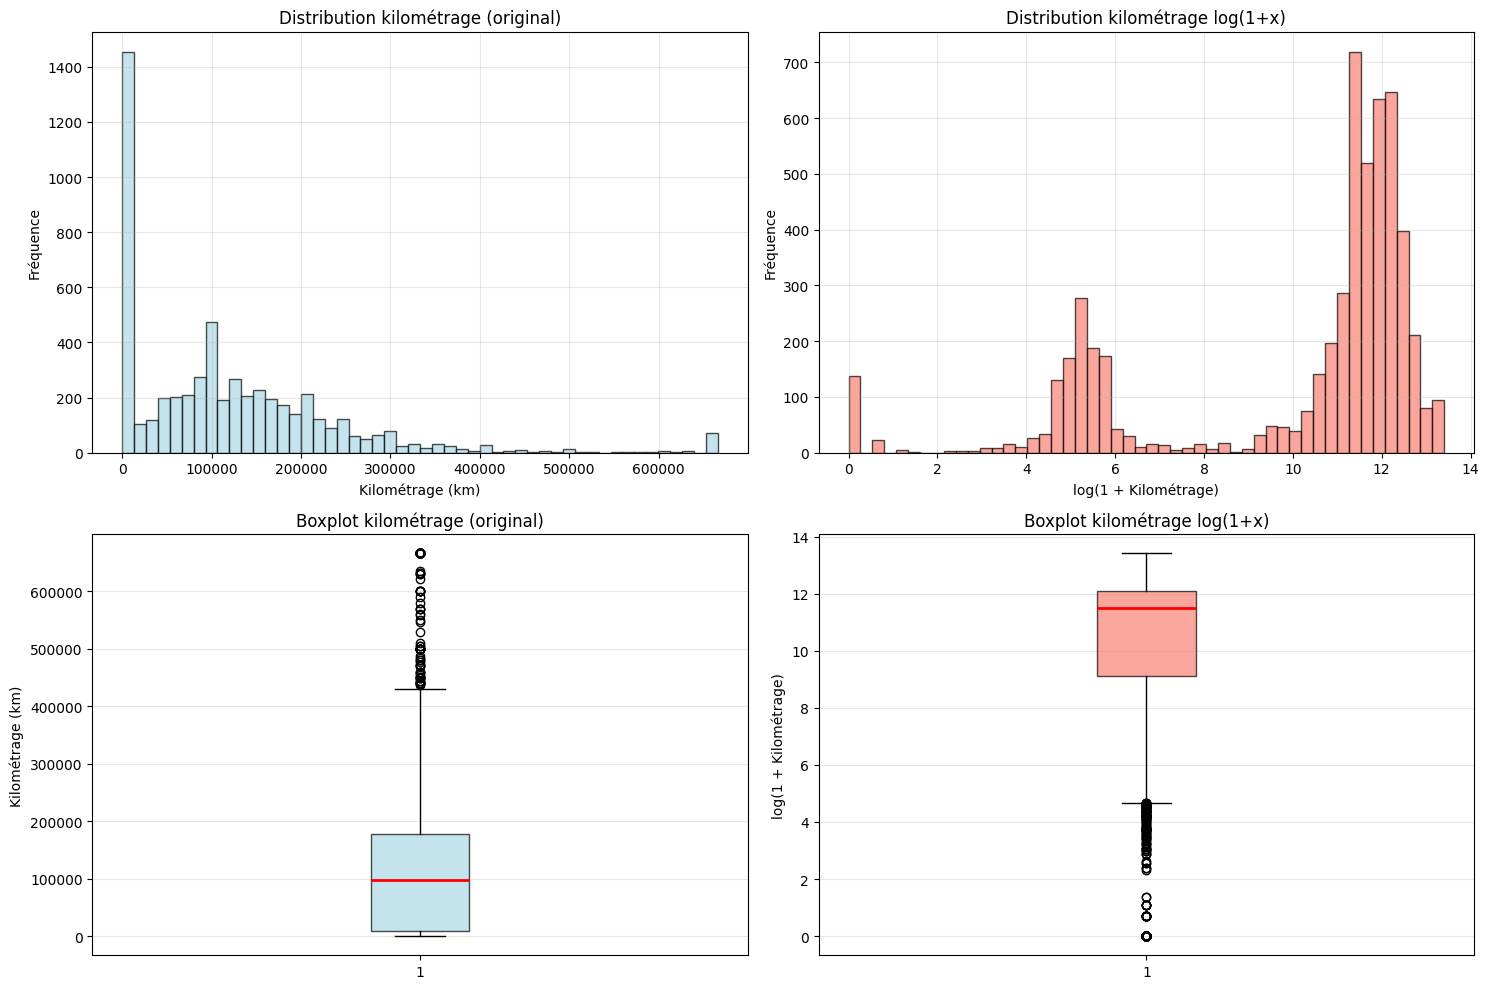


✓ Transformation terminée!
✓ La nouvelle colonne 'kilometrage_log' est prête pour la modélisation


In [122]:
# Application de la transformation log(1+x) au kilométrage
print("Application de la transformation log(1+x) au kilométrage...")
print("="*80)

# Statistiques AVANT transformation
print("AVANT transformation:")
print(f"{'-'*80}")
if df_copy['kilometrage'].notna().sum() > 0:
    km_before = df_copy['kilometrage'].dropna()
    print(f"  Min: {km_before.min():,.0f} km")
    print(f"  Max: {km_before.max():,.0f} km")
    print(f"  Moyenne: {km_before.mean():,.0f} km")
    print(f"  Médiane: {km_before.median():,.0f} km")
    print(f"  Skewness: {km_before.skew():.3f}")
    print(f"  Écart-type: {km_before.std():,.0f} km")

# Créer une nouvelle colonne avec la transformation log
df_copy['kilometrage_log'] = np.log1p(df_copy['kilometrage'])

# Statistiques APRÈS transformation
print(f"\n{'='*80}")
print("APRÈS transformation log(1+x):")
print(f"{'-'*80}")
if df_copy['kilometrage_log'].notna().sum() > 0:
    km_after = df_copy['kilometrage_log'].dropna()
    print(f"  Min: {km_after.min():.3f}")
    print(f"  Max: {km_after.max():.3f}")
    print(f"  Moyenne: {km_after.mean():.3f}")
    print(f"  Médiane: {km_after.median():.3f}")
    print(f"  Skewness: {km_after.skew():.3f}")
    print(f"  Écart-type: {km_after.std():.3f}")

print(f"\n{'='*80}")
print(f"✓ Nouvelle colonne 'kilometrage_log' créée!")
print(f"✓ Valeurs transformées: {df_copy['kilometrage_log'].notna().sum()}")
print(f"✓ Valeurs manquantes: {df_copy['kilometrage_log'].isna().sum()}")

# Visualisation comparée
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Histogramme kilométrage original
axes[0, 0].hist(df_copy['kilometrage'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='lightblue')
axes[0, 0].set_title('Distribution kilométrage (original)')
axes[0, 0].set_xlabel('Kilométrage (km)')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].grid(True, alpha=0.3)

# 2. Histogramme kilométrage transformé
axes[0, 1].hist(df_copy['kilometrage_log'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='salmon')
axes[0, 1].set_title('Distribution kilométrage log(1+x)')
axes[0, 1].set_xlabel('log(1 + Kilométrage)')
axes[0, 1].set_ylabel('Fréquence')
axes[0, 1].grid(True, alpha=0.3)

# 3. Boxplot kilométrage original
axes[1, 0].boxplot(df_copy['kilometrage'].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
axes[1, 0].set_title('Boxplot kilométrage (original)')
axes[1, 0].set_ylabel('Kilométrage (km)')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Boxplot kilométrage transformé
axes[1, 1].boxplot(df_copy['kilometrage_log'].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='salmon', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
axes[1, 1].set_title('Boxplot kilométrage log(1+x)')
axes[1, 1].set_ylabel('log(1 + Kilométrage)')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\n{'='*80}")
print("✓ Transformation terminée!")
print("✓ La nouvelle colonne 'kilometrage_log' est prête pour la modélisation")

In [123]:
df_copy['kilometrage'].isnull().sum()

0

In [124]:
# Vérification des valeurs manquantes
missing_values = df_copy.isnull().sum()
missing_percentage = (missing_values / len(df_copy)) * 100

missing_df = pd.DataFrame({
    'Valeurs_Manquantes': missing_values,
    'Pourcentage': missing_percentage
})

missing_df = missing_df[missing_df['Valeurs_Manquantes'] > 0].sort_values(
    'Valeurs_Manquantes', ascending=False
)

if len(missing_df) > 0:
    print("Valeurs manquantes détectées:")
    print(missing_df)
else:
    print("✓ Aucune valeur manquante détectée dans le dataset!")

Valeurs manquantes détectées:
                     Valeurs_Manquantes  Pourcentage
type_de_carrosserie                 722    12.978609
etat_du_vehicule                    397     7.136437
puissance_fiscale                   394     7.082509
cylindree                           390     7.010606
annee                               360     6.471328
carburant                           245     4.404099
couleur_du_vehicule                 194     3.487327


In [125]:
# 🔧 NETTOYAGE DES VALEURS CATÉGORIELLES ABERRANTES
print("="*80)
print("NETTOYAGE DES VALEURS CATÉGORIELLES")
print("="*80)

# 1. Nettoyage de la colonne 'carburant' - Supprimer les valeurs aberrantes
valeurs_aberrantes_carburant = ['📞 Contact :', '✔️ Idéale pour la ville']
for val in valeurs_aberrantes_carburant:
    count_avant = (df_copy['carburant'] == val).sum()
    if count_avant > 0:
        df_copy.loc[df_copy['carburant'] == val, 'carburant'] = np.nan

# 2. Nettoyage de la colonne 'boite' - Remplacer '6' par 'manuelle'
count_6 = (df_copy['boite'] == '6').sum()
if count_6 > 0:
    df_copy.loc[df_copy['boite'] == '6', 'boite'] = 'manuelle'

# 3. Nettoyage de la colonne 'couleur_du_vehicule' - Unifier 'or' et 'Doré'
count_or = (df_copy['couleur_du_vehicule'] == 'or').sum()
count_dore = (df_copy['couleur_du_vehicule'] == 'Doré').sum()

# Unifier vers 'or' (minuscule)
df_copy.loc[df_copy['couleur_du_vehicule'] == 'Or', 'couleur_du_vehicule'] = 'Doré'
count_apres = (df_copy['couleur_du_vehicule'] == 'Doré').sum()

print("\n" + "="*80)
print("RÉSUMÉ DES MODIFICATIONS:")
print("-"*80)
print(f"  • carburant: Valeurs aberrantes supprimées → {df_copy['carburant'].isnull().sum()} NaN ajoutés")
print(f"  • boite: '6' → 'manuelle' ({count_6} modifications)")
print(f"  • couleur_du_vehicule: 'or' et 'Doré' unifiés ({count_dore} modifications)")
print("="*80)

NETTOYAGE DES VALEURS CATÉGORIELLES

RÉSUMÉ DES MODIFICATIONS:
--------------------------------------------------------------------------------
  • carburant: Valeurs aberrantes supprimées → 247 NaN ajoutés
  • boite: '6' → 'manuelle' (2 modifications)
  • couleur_du_vehicule: 'or' et 'Doré' unifiés (28 modifications)


In [126]:
# Remplacement des valeurs manquantes catégoriques par 'inconnu'
print("Traitement des valeurs manquantes catégoriques...")
print("="*80)

# Identifier les colonnes catégoriques dans df_copy
categorical_cols_copy = df_copy.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols_copy:
    missing_count = df_copy[col].isnull().sum()
    df_copy[col].replace('nan','inconnu',inplace=True)
    if missing_count > 0:
        df_copy[col].fillna('inconnu', inplace=True)
        print(f"✓ {col}: {missing_count} valeurs manquantes remplacées par 'inconnu'")
    else:
        print(f"✓ {col}: Aucune valeur manquante")

print("\n" + "="*80)
print("Vérification après traitement:")
print(f"Valeurs manquantes restantes dans les colonnes catégoriques: {df_copy[categorical_cols_copy].isnull().sum().sum()}")


Traitement des valeurs manquantes catégoriques...
✓ couleur_du_vehicule: 194 valeurs manquantes remplacées par 'inconnu'
✓ etat_du_vehicule: 397 valeurs manquantes remplacées par 'inconnu'
✓ boite: Aucune valeur manquante
✓ marque: Aucune valeur manquante
✓ modele: Aucune valeur manquante
✓ type_de_carrosserie: 722 valeurs manquantes remplacées par 'inconnu'
✓ carburant: 247 valeurs manquantes remplacées par 'inconnu'

Vérification après traitement:
Valeurs manquantes restantes dans les colonnes catégoriques: 0


In [127]:
# Vérification des valeurs manquantes
missing_values = df_copy.isnull().sum()
missing_percentage = (missing_values / len(df_copy)) * 100

missing_df = pd.DataFrame({
    'Valeurs_Manquantes': missing_values,
    'Pourcentage': missing_percentage
})

missing_df = missing_df[missing_df['Valeurs_Manquantes'] > 0].sort_values(
    'Valeurs_Manquantes', ascending=False
)

if len(missing_df) > 0:
    print("Valeurs manquantes détectées:")
    print(missing_df)
else:
    print("✓ Aucune valeur manquante détectée dans le dataset!")

Valeurs manquantes détectées:
                   Valeurs_Manquantes  Pourcentage
puissance_fiscale                 394     7.082509
cylindree                         390     7.010606
annee                             360     6.471328


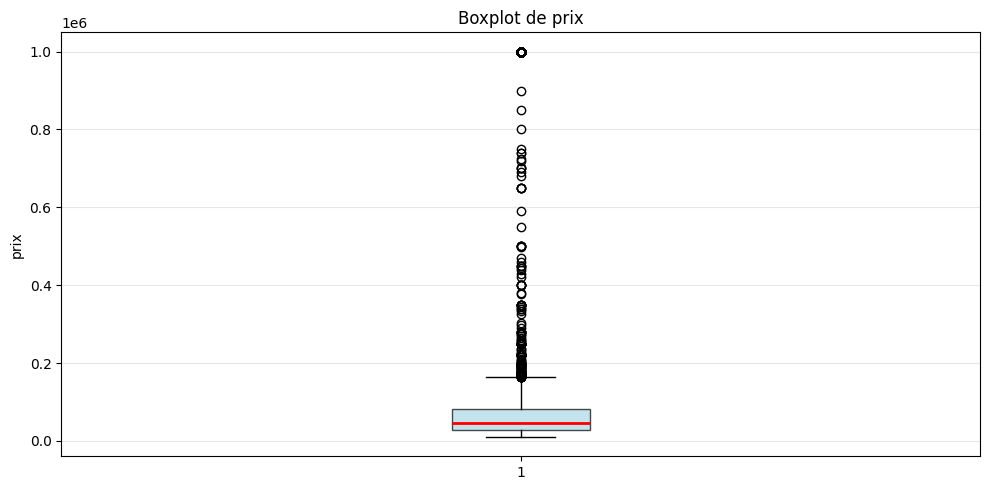

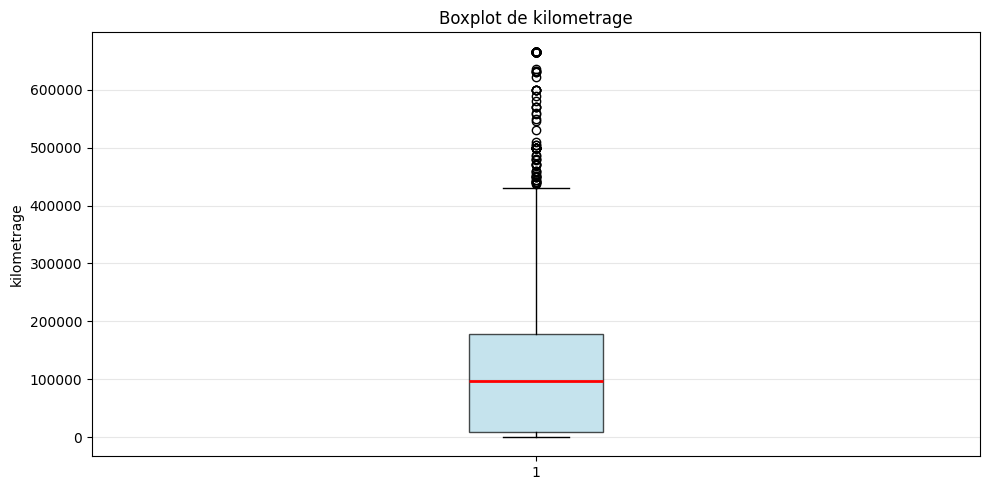

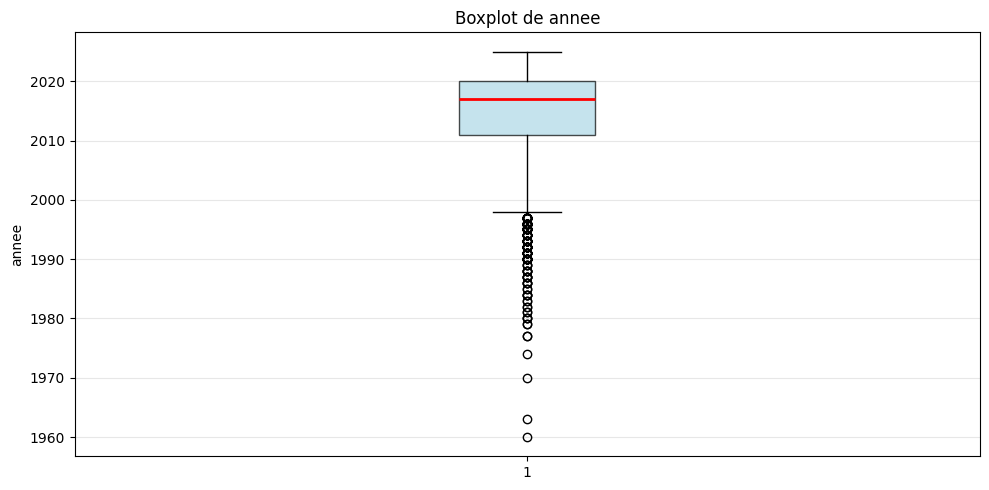

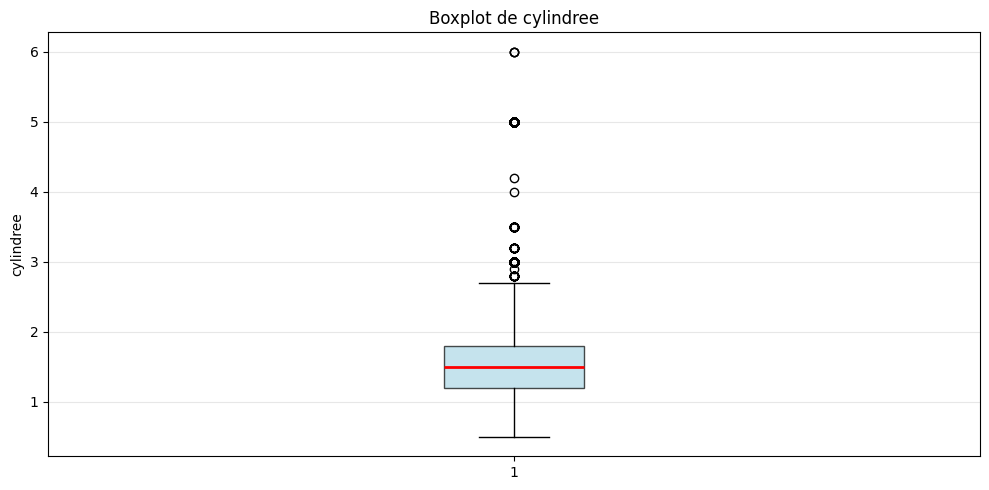

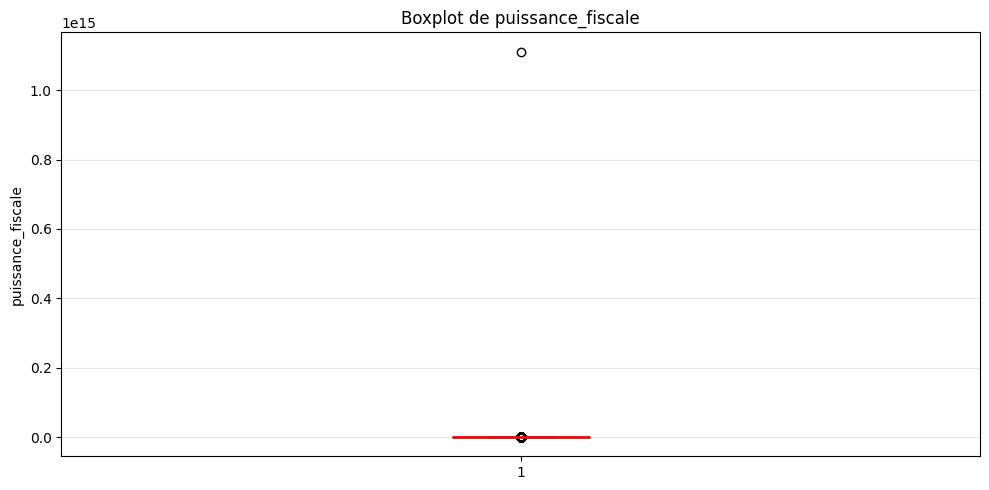

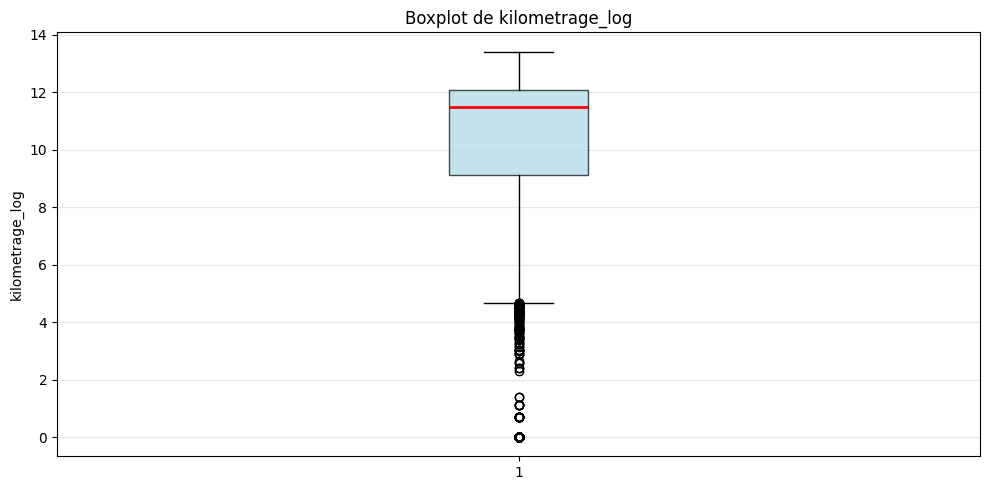

In [128]:
# Boxplots des variables numériques
numerical_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    plt.boxplot(df_copy[col].dropna(), vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

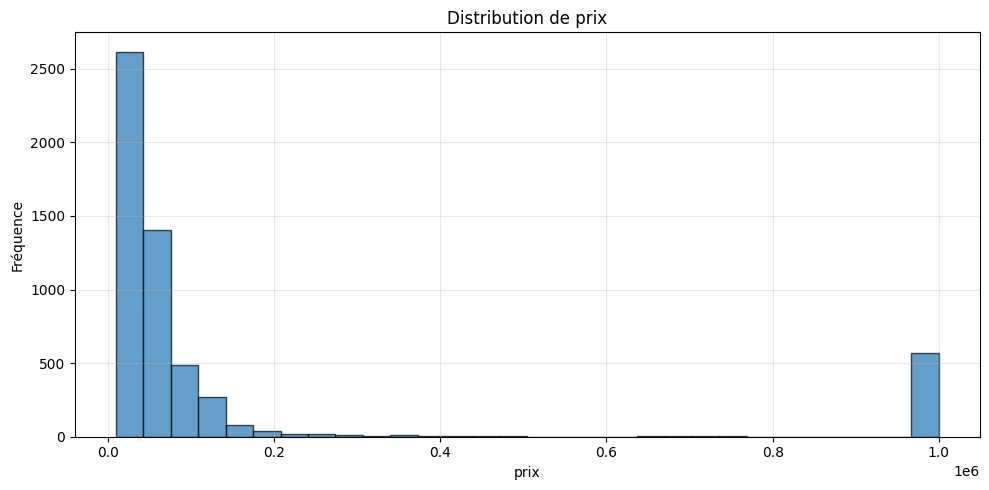

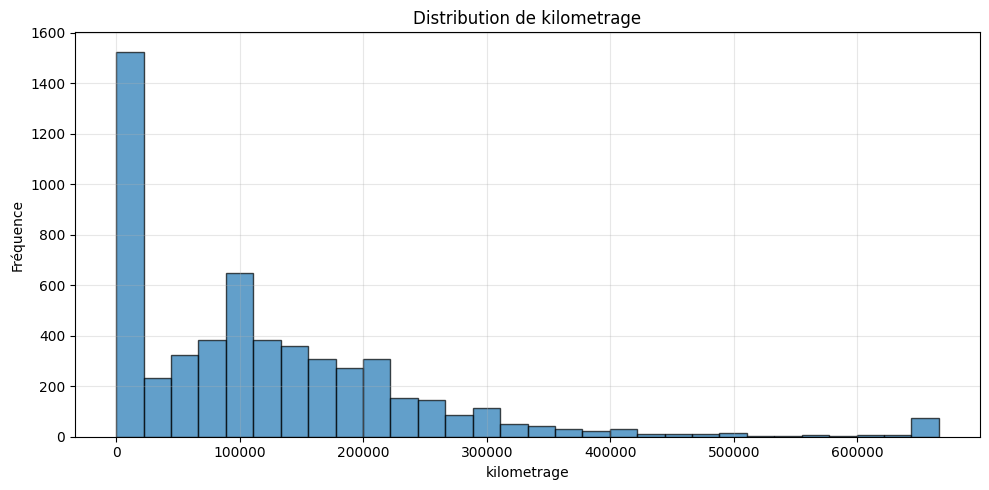

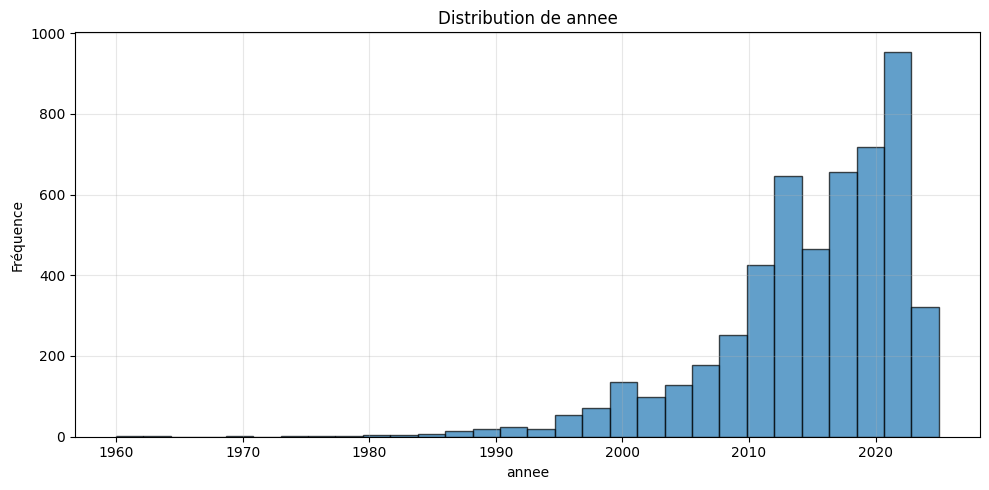

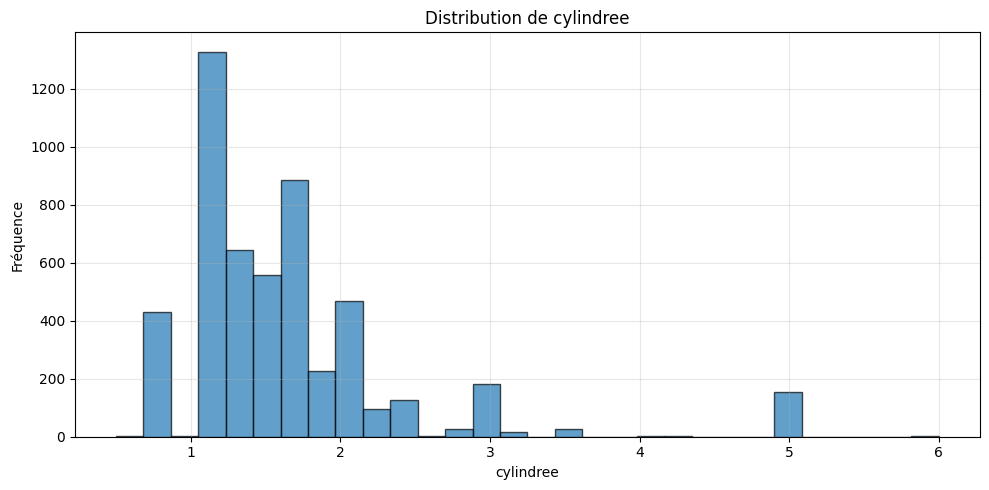

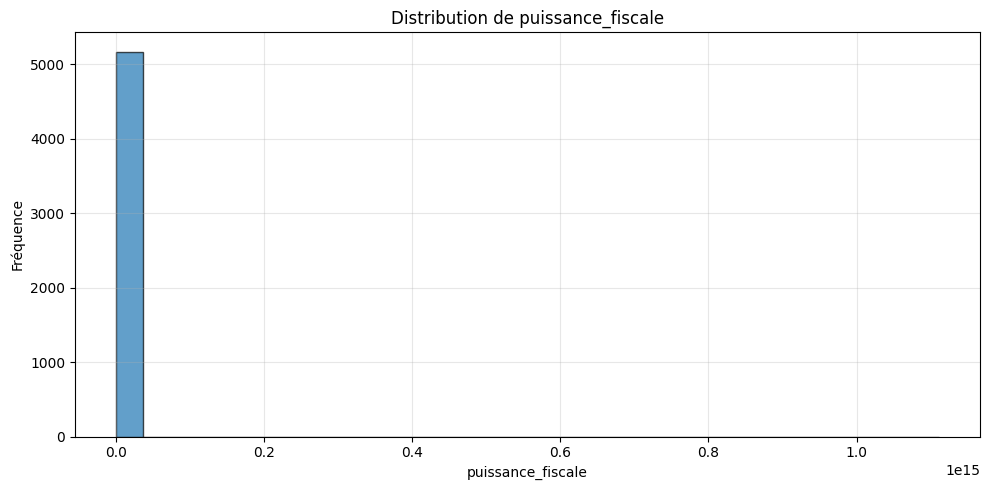

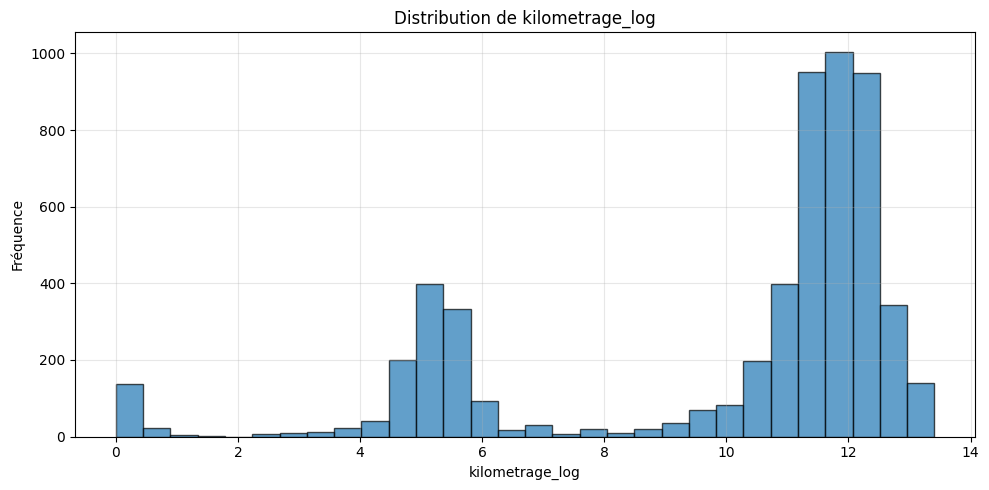


Statistiques des variables numériques:


In [129]:
# Distribution des variables numériques
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    plt.hist(df_copy[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print(f"\n{'='*80}")
print("Statistiques des variables numériques:")
# print(df[numerical_cols].describe().T)

Colonnes numériques dans df_copy: ['prix', 'kilometrage', 'annee', 'cylindree', 'puissance_fiscale', 'kilometrage_log']



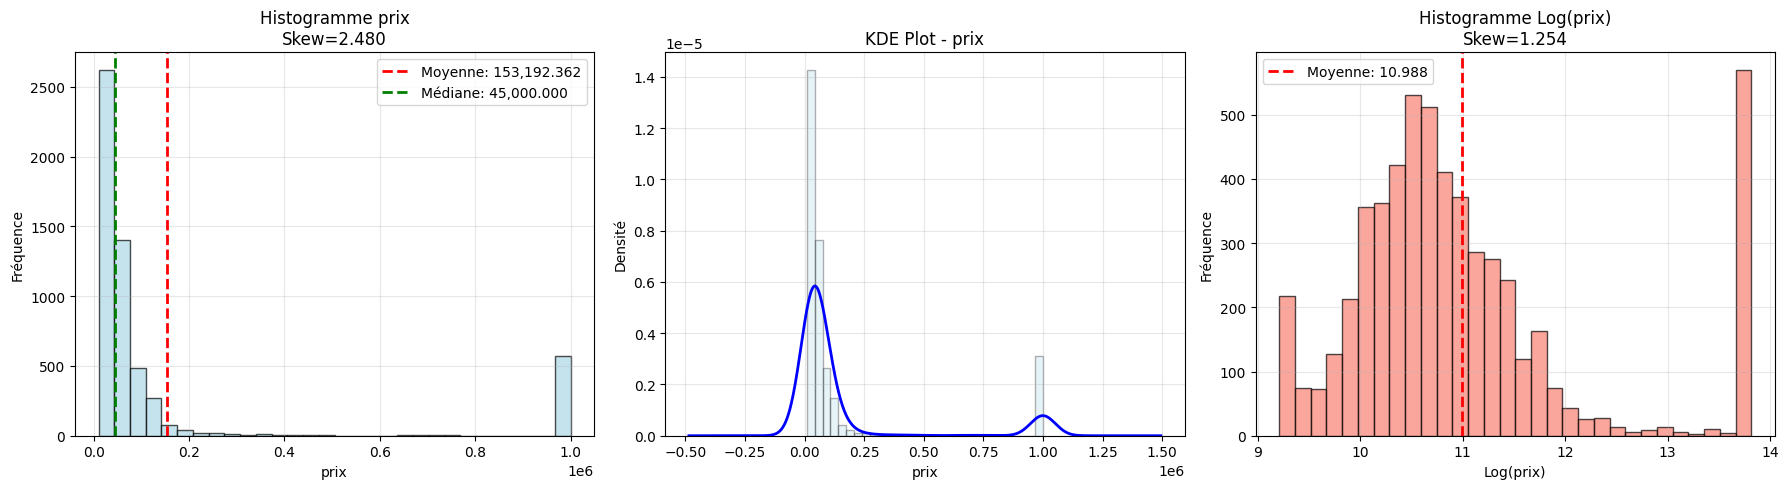


Statistiques pour prix:
  Moyenne: 153,192.362
  Médiane: 45,000.000
  Skewness: 2.480
  Min: 10,000.000
  Max: 1,000,000.000
  Std: 291,688.946


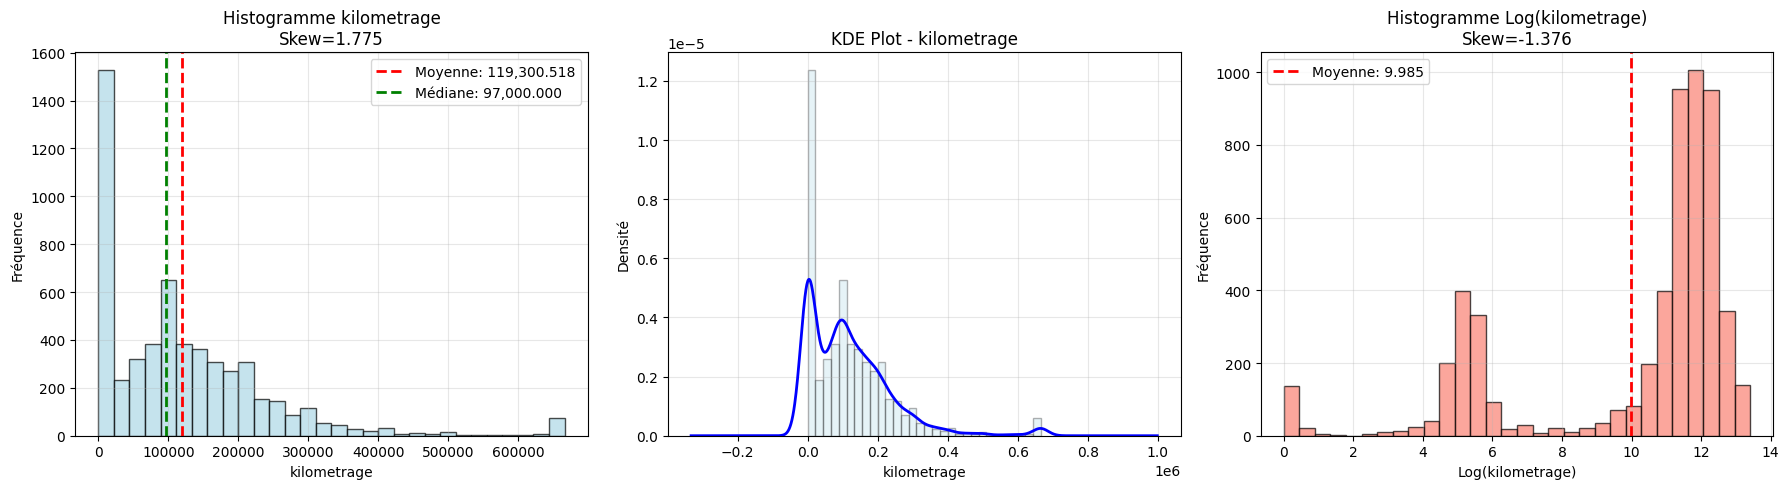


Statistiques pour kilometrage:
  Moyenne: 119,300.518
  Médiane: 97,000.000
  Skewness: 1.775
  Min: 0.000
  Max: 666,106.560
  Std: 121,697.434


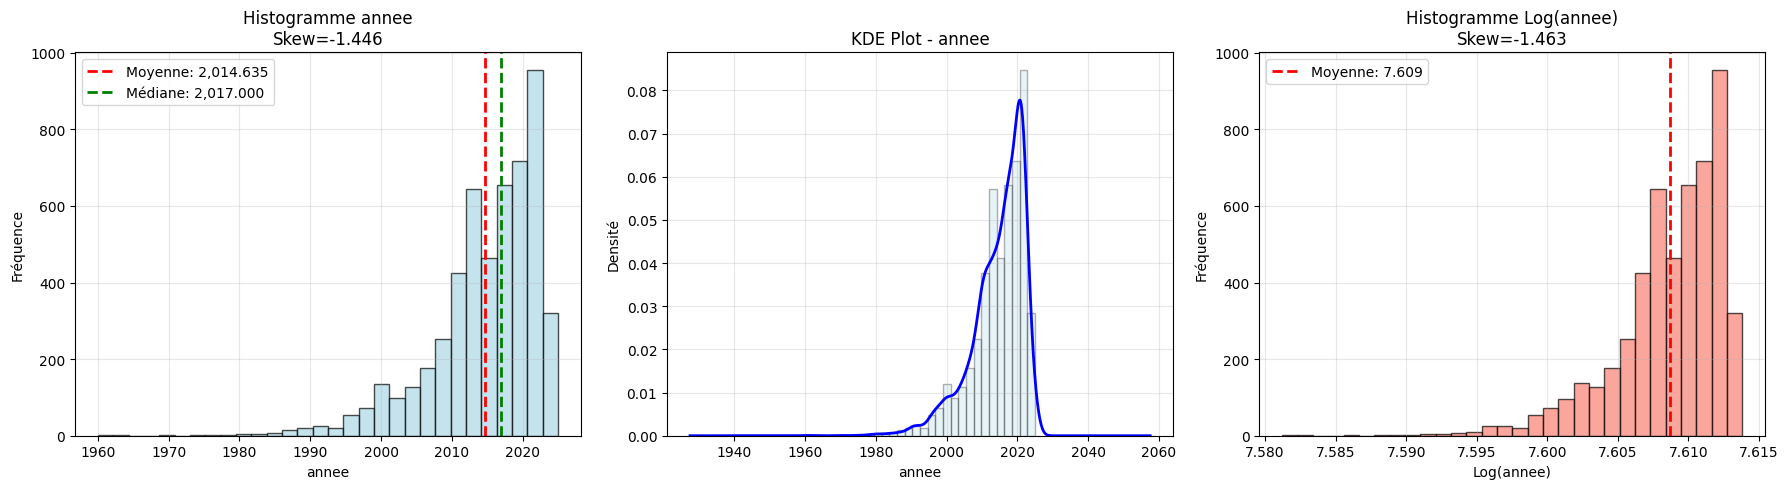


Statistiques pour annee:
  Moyenne: 2,014.635
  Médiane: 2,017.000
  Skewness: -1.446
  Min: 1,960.000
  Max: 2,025.000
  Std: 7.560


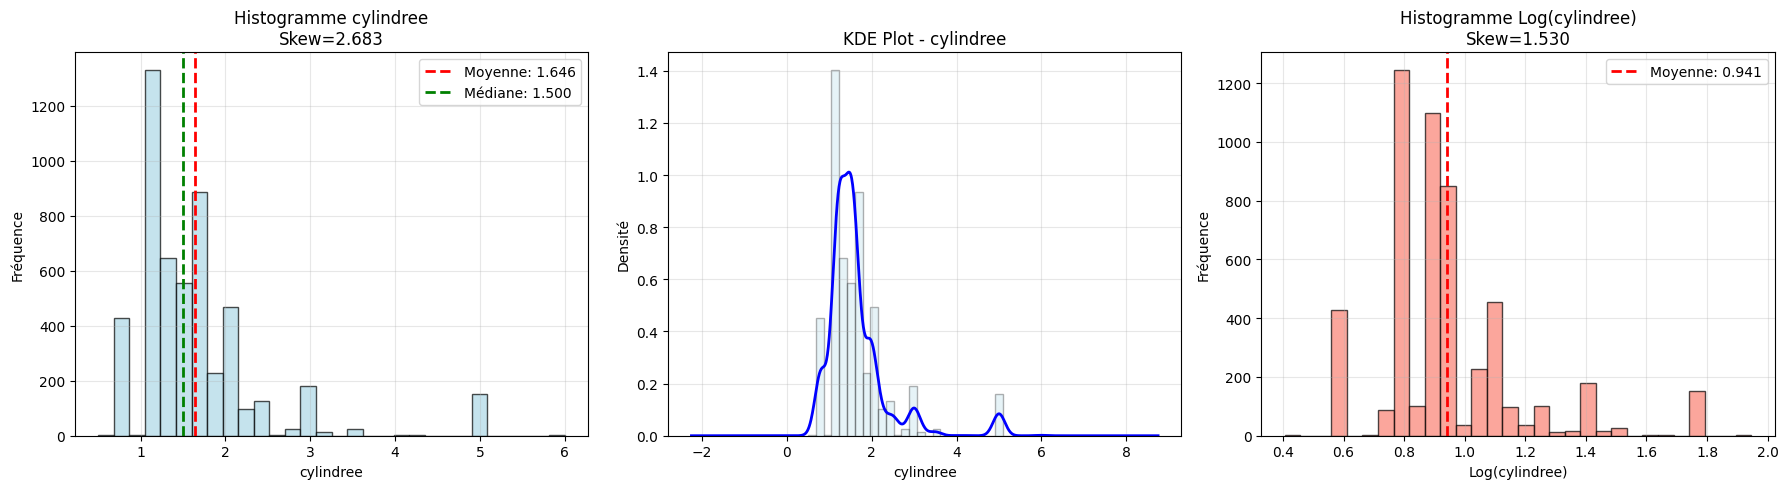


Statistiques pour cylindree:
  Moyenne: 1.646
  Médiane: 1.500
  Skewness: 2.683
  Min: 0.500
  Max: 6.000
  Std: 0.776


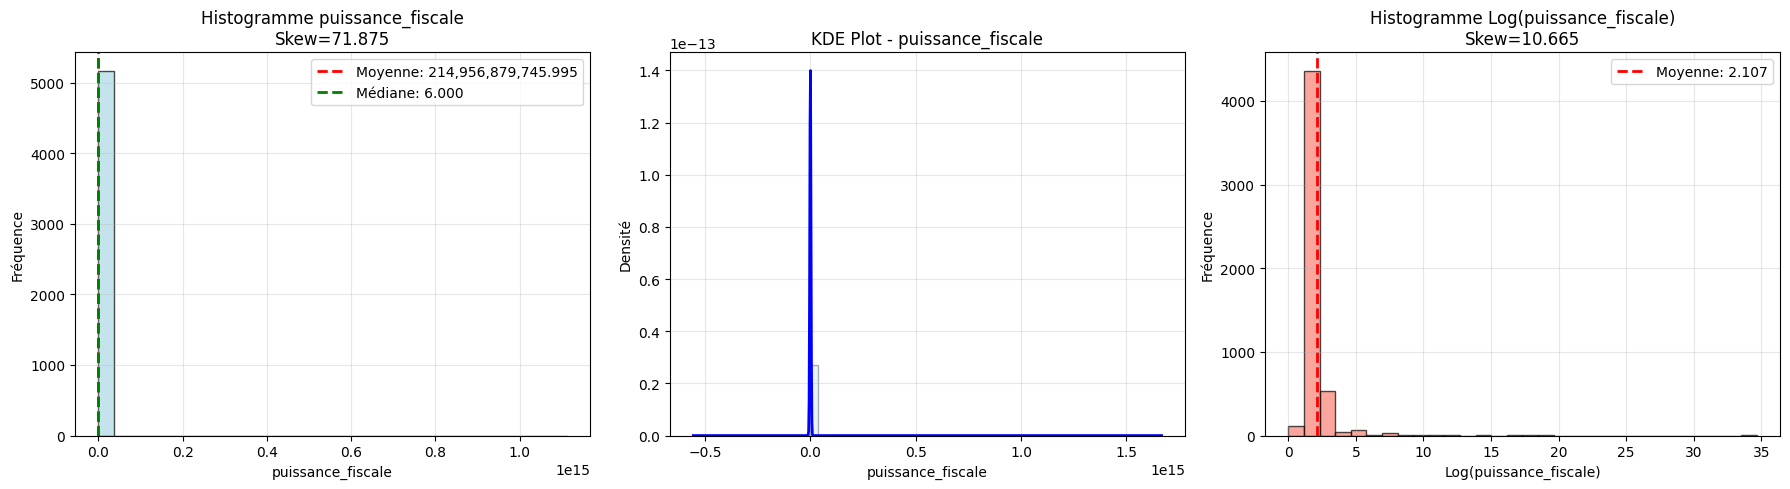


Statistiques pour puissance_fiscale:
  Moyenne: 214,956,879,745.995
  Médiane: 6.000
  Skewness: 71.875
  Min: 0.000
  Max: 1,111,111,111,111,111.000
  Std: 15,454,473,863,320.570


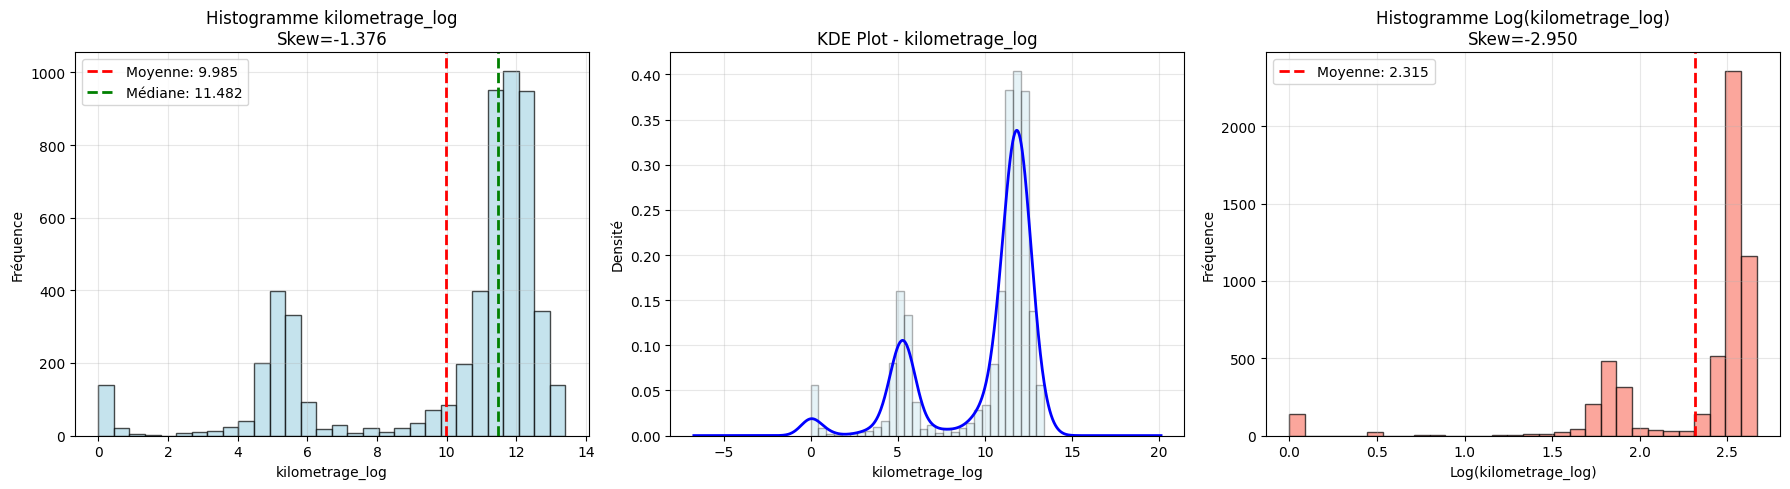


Statistiques pour kilometrage_log:
  Moyenne: 9.985
  Médiane: 11.482
  Skewness: -1.376
  Min: 0.000
  Max: 13.409
  Std: 3.234


In [130]:
# Distribution détaillée des variables numériques (Histogramme, KDE, Log-transform)
from scipy.stats import skew

# Utiliser df_copy et s'assurer que les colonnes sont bien numériques
numerical_cols_copy = df_copy.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Colonnes numériques dans df_copy: {numerical_cols_copy}\n")

for col in numerical_cols_copy:
    # Convertir en numérique si nécessaire
    data = pd.to_numeric(df_copy[col], errors='coerce').dropna()
    
    if len(data) == 0:
        print(f"⚠️ Aucune donnée valide pour {col}, passage à la colonne suivante")
        continue
    
    # Créer une figure avec 3 sous-graphiques
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Calcul des statistiques
    mean_val = data.mean()
    median_val = data.median()
    skew_val = skew(data)
    
    # 1. Histogramme avec moyenne et médiane
    axes[0].hist(data, bins=30, edgecolor='black', alpha=0.7, color='lightblue')
    axes[0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {mean_val:,.3f}')
    axes[0].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Médiane: {median_val:,.3f}')
    axes[0].set_title(f'Histogramme {col}\nSkew={skew_val:.3f}')
    axes[0].set_xlabel(f'{col}')
    axes[0].set_ylabel('Fréquence')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # 2. KDE Plot (Kernel Density Estimation)
    axes[1].hist(data, bins=30, density=True, alpha=0.3, edgecolor='black', color='lightblue')
    data.plot(kind='kde', ax=axes[1], linewidth=2, color='blue')
    axes[1].set_title(f'KDE Plot - {col}')
    axes[1].set_xlabel(f'{col}')
    axes[1].set_ylabel('Densité')
    axes[1].grid(True, alpha=0.3)
    
    # 3. Histogramme avec transformation logarithmique (si toutes les valeurs sont positives)
    if (data >= 0).all():
        log_data = np.log1p(data)
        log_mean = log_data.mean()
        log_skew = skew(log_data)
        
        axes[2].hist(log_data, bins=30, edgecolor='black', alpha=0.7, color='salmon')
        axes[2].axvline(log_mean, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {log_mean:.3f}')
        axes[2].set_title(f'Histogramme Log({col})\nSkew={log_skew:.3f}')
        axes[2].set_xlabel(f'Log({col})')
        axes[2].set_ylabel('Fréquence')
        axes[2].legend()
        axes[2].grid(True, alpha=0.3)
    else:
        axes[2].text(0.5, 0.5, 'Transformation log\nnon applicable\n(valeurs ≤ 0)', 
                     ha='center', va='center', fontsize=12)
        axes[2].set_title(f'Histogramme Log({col})')
    
    plt.tight_layout()
    plt.show()
    
    # Afficher les statistiques
    print(f"\n{'='*80}")
    print(f"Statistiques pour {col}:")
    print(f"  Moyenne: {mean_val:,.3f}")
    print(f"  Médiane: {median_val:,.3f}")
    print(f"  Skewness: {skew_val:.3f}")
    print(f"  Min: {data.min():,.3f}")
    print(f"  Max: {data.max():,.3f}")
    print(f"  Std: {data.std():,.3f}")

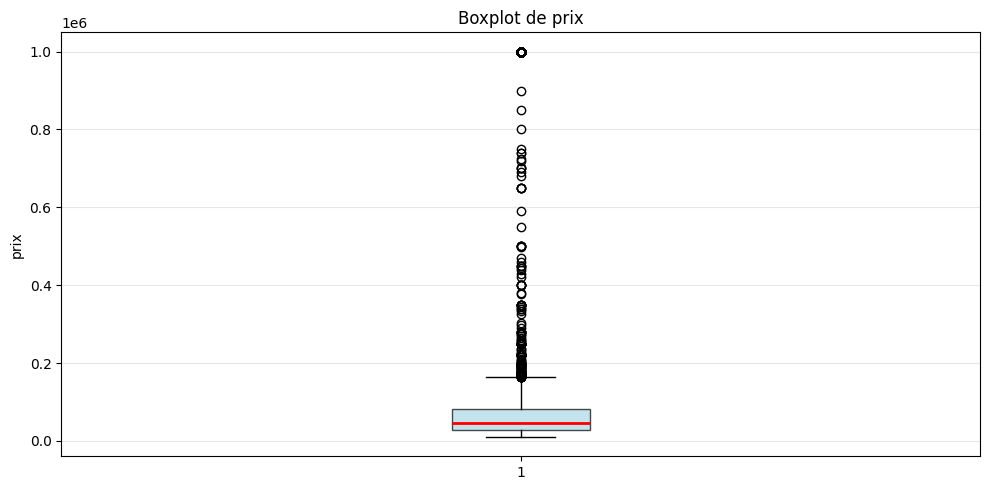

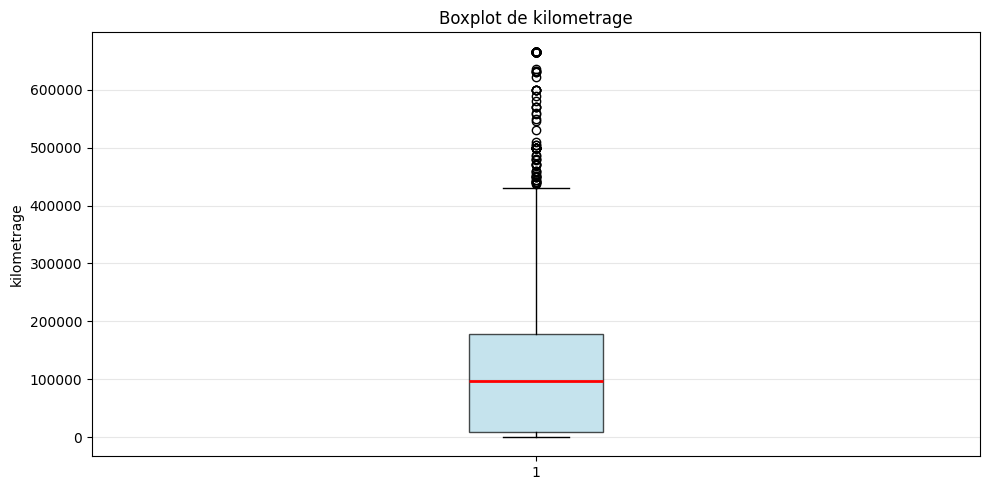

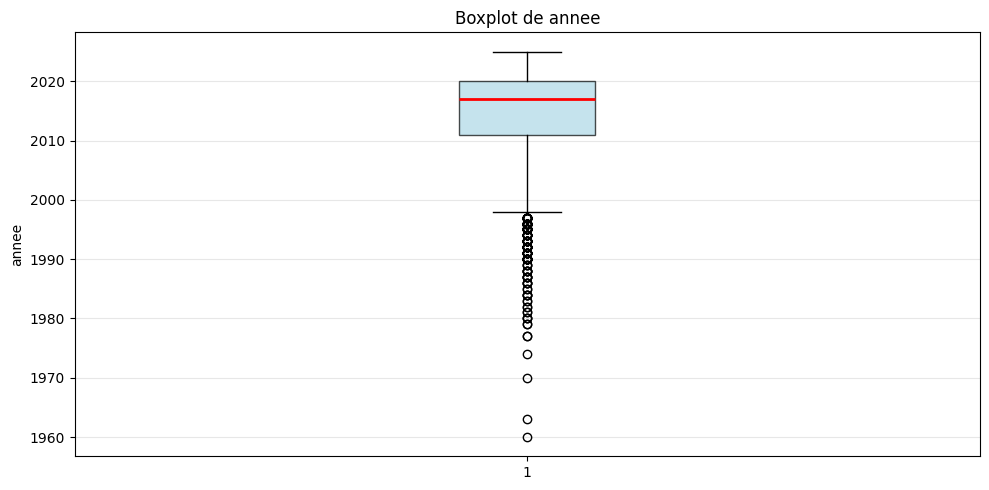

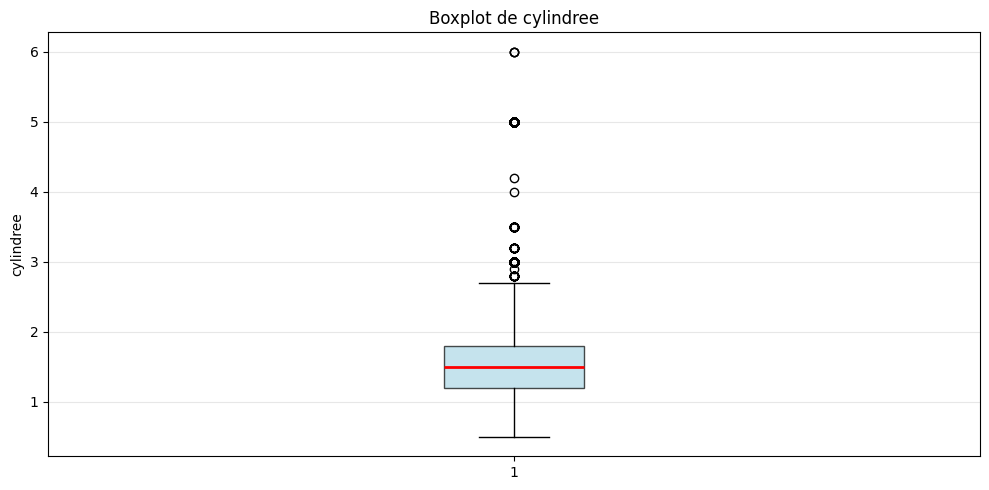

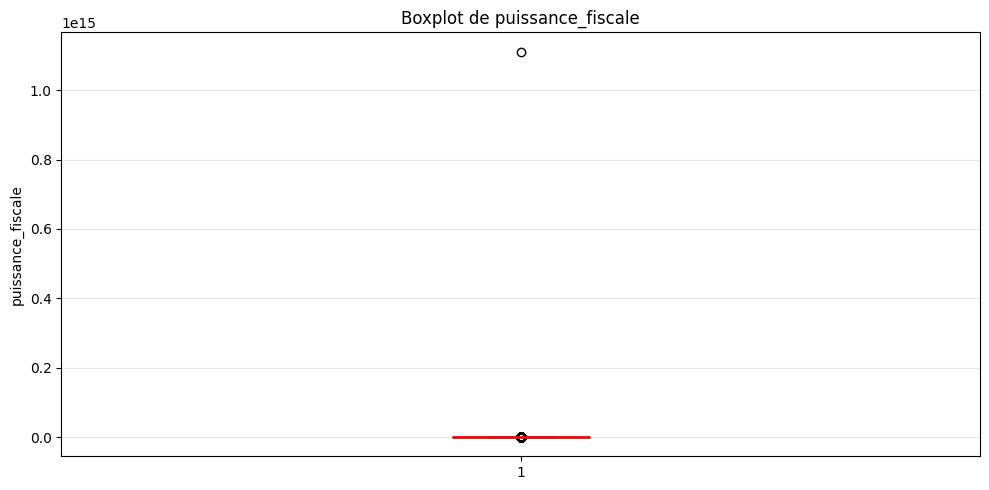

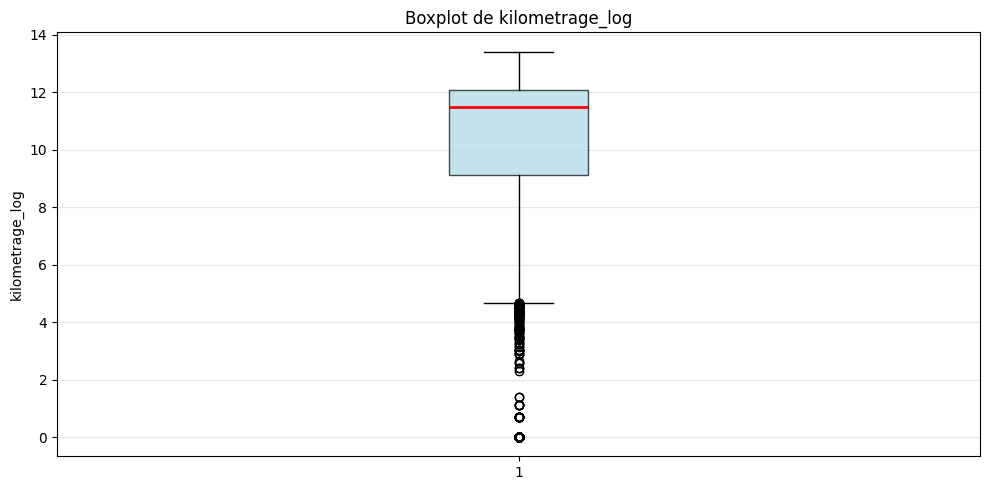

In [131]:
# Boxplots des variables numériques
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    plt.boxplot(df_copy[col].dropna(), vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

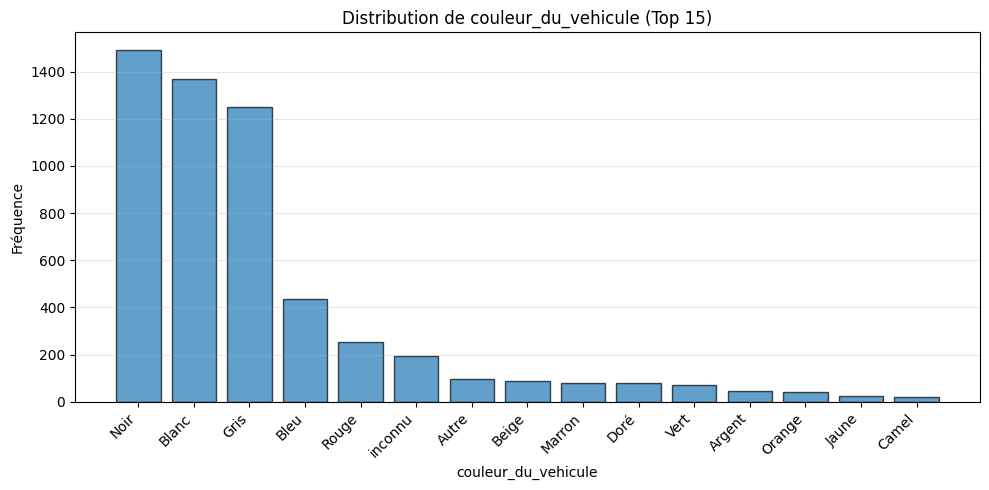

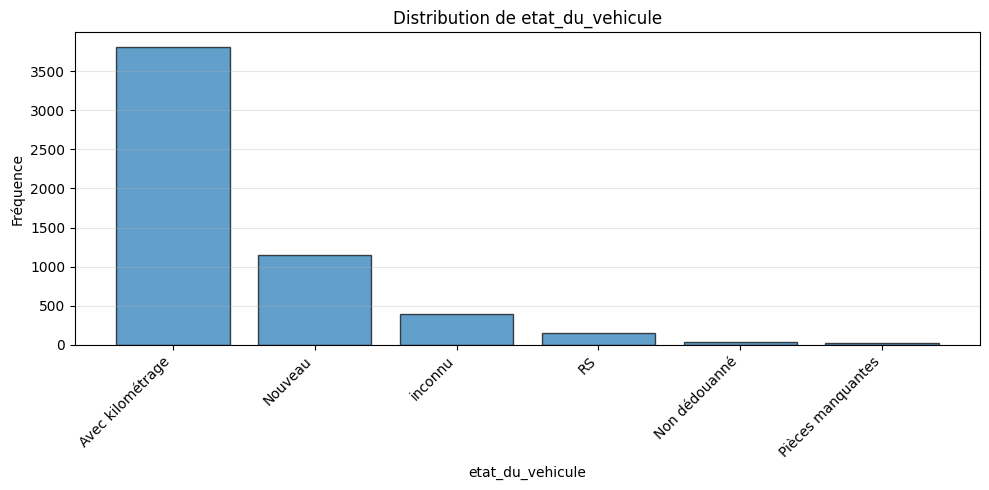

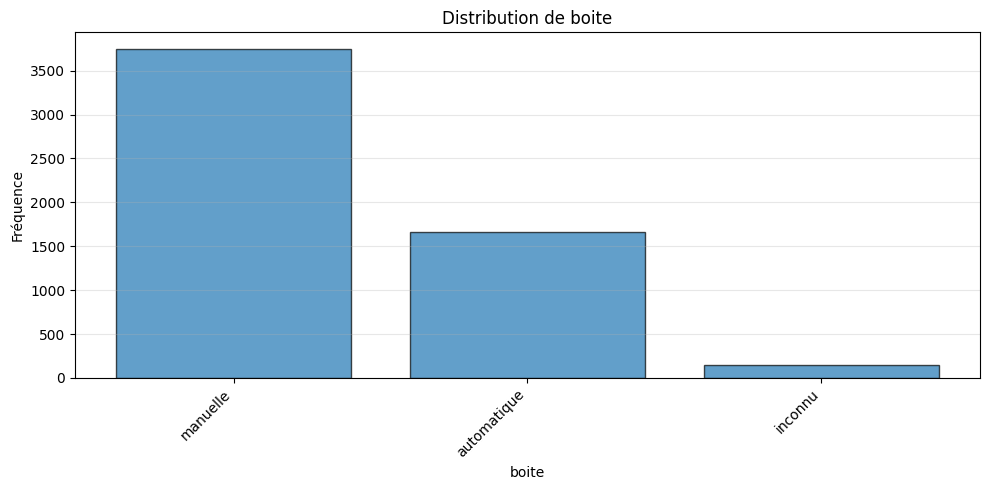

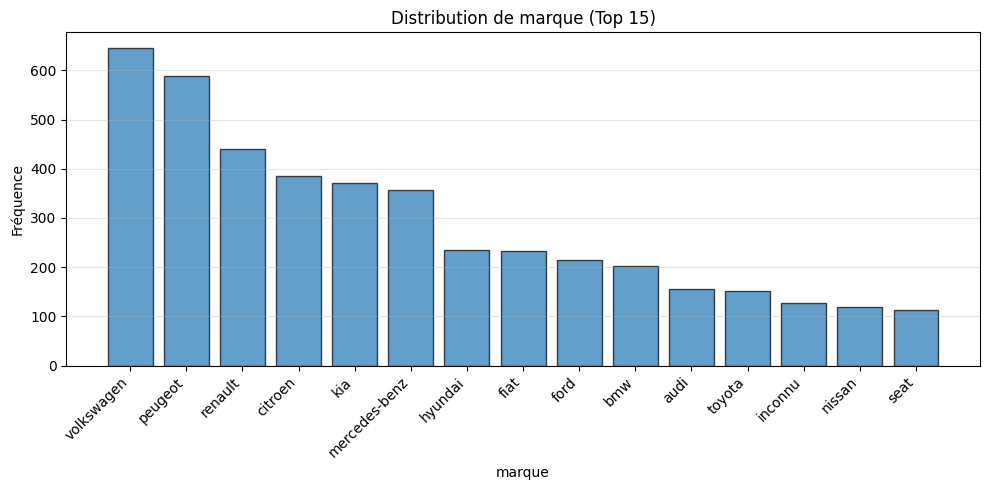

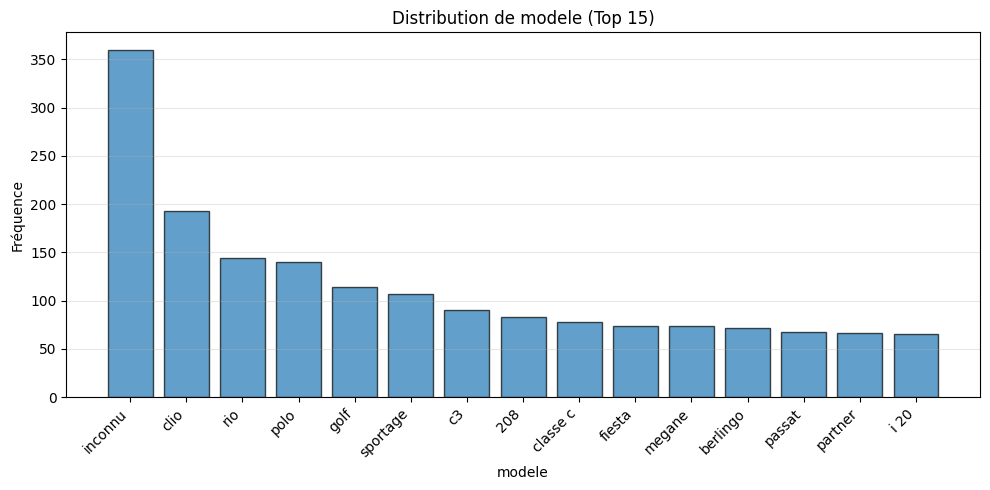

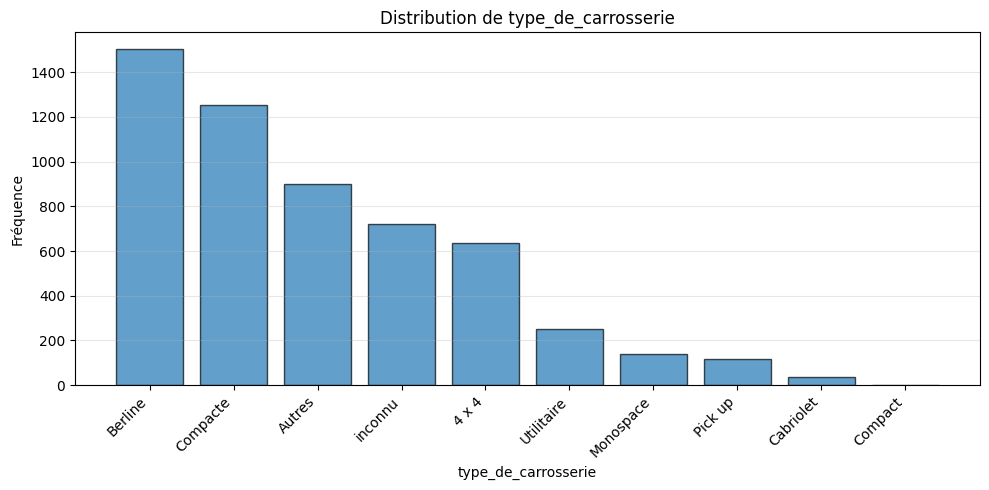

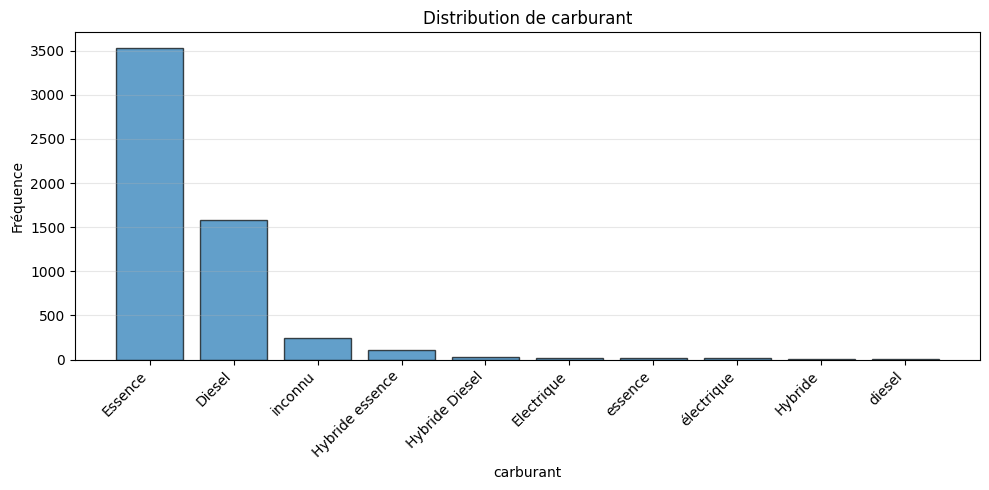


Nombre de valeurs uniques par variable catégorique:
  couleur_du_vehicule: 19 valeurs uniques
  etat_du_vehicule: 6 valeurs uniques
  boite: 3 valeurs uniques
  marque: 60 valeurs uniques
  modele: 465 valeurs uniques
  type_de_carrosserie: 10 valeurs uniques
  carburant: 10 valeurs uniques


In [132]:
# Distribution des variables catégoriques
for col in categorical_cols_copy:
    value_counts = df_copy[col].value_counts()
    
    # Limiter à 15 catégories les plus fréquentes si nécessaire
    if len(value_counts) > 15:
        value_counts = value_counts.head(15)
        title = f'Distribution de {col} (Top 15)'
    else:
        title = f'Distribution de {col}'
    
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(value_counts)), value_counts.values, alpha=0.7, edgecolor='black')
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.xticks(range(len(value_counts)), value_counts.index, rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

# Afficher le nombre de valeurs uniques pour chaque variable catégorique
print(f"\n{'='*80}")
print("Nombre de valeurs uniques par variable catégorique:")
for col in categorical_cols_copy:
    unique_count = df_copy[col].nunique()
    print(f"  {col}: {unique_count} valeurs uniques")

In [133]:
df_copy['carburant'].unique()

array(['Essence', 'Hybride essence', 'Diesel', 'électrique', 'inconnu',
       'Hybride Diesel', 'Electrique', 'Hybride', 'essence', 'diesel'],
      dtype=object)

In [134]:
df.drop_duplicates(inplace=True)

In [135]:
df.duplicated().sum()

0

MATRICE DE CORRÉLATION DES VARIABLES NUMÉRIQUES

Nombre de variables numériques: 6
Variables: ['prix', 'kilometrage', 'annee', 'cylindree', 'puissance_fiscale', 'kilometrage_log']



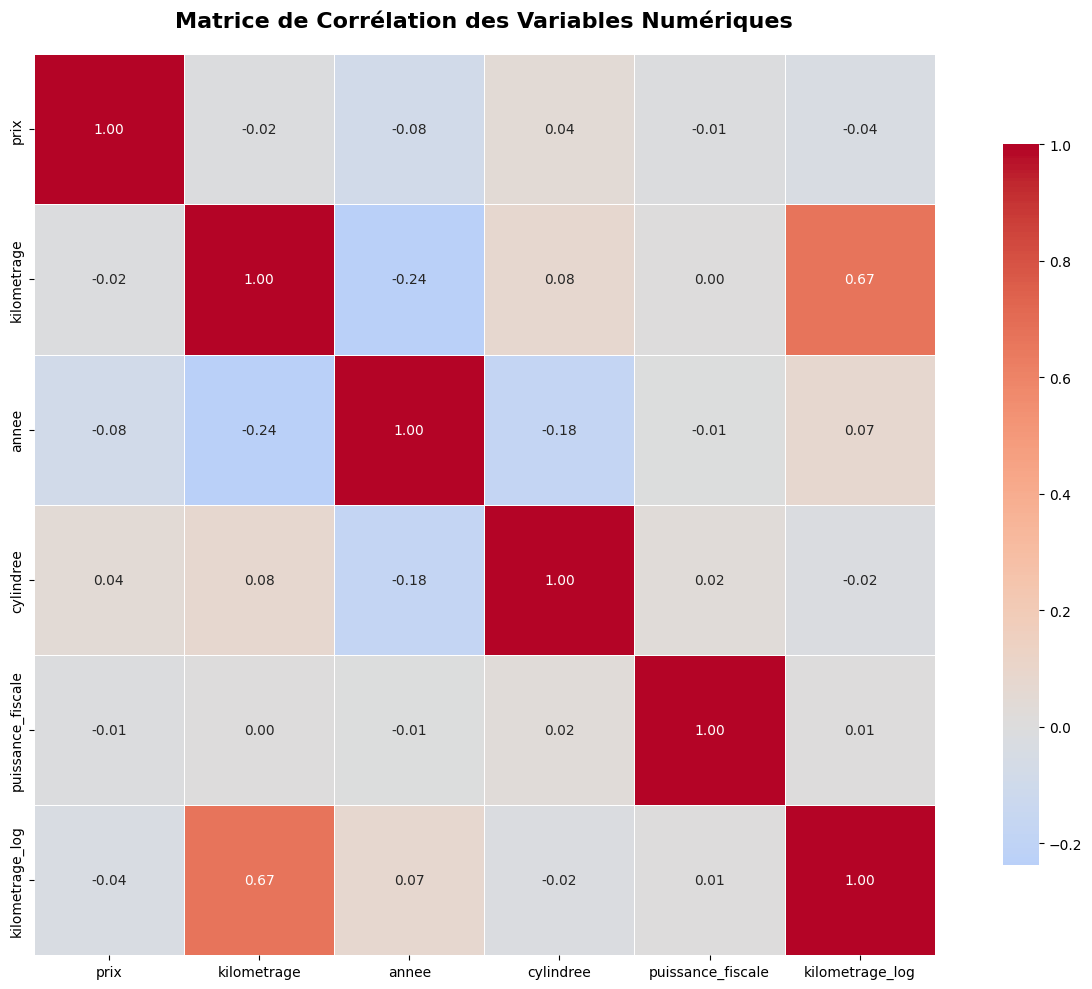


CORRÉLATIONS AVEC LE PRIX (variable cible)

Corrélations triées par ordre décroissant:
--------------------------------------------------------------------------------
  cylindree           :  0.043  ⚪ Faible
  puissance_fiscale   : -0.006  ⚪ Faible
  kilometrage         : -0.015  ⚪ Faible
  kilometrage_log     : -0.036  ⚪ Faible
  annee               : -0.083  ⚪ Faible

PAIRES DE VARIABLES FORTEMENT CORRÉLÉES (|r| > 0.7)

Ces variables peuvent présenter de la multicolinéarité:
--------------------------------------------------------------------------------
  ✅ Aucune forte corrélation détectée entre les variables (hors prix)



In [136]:
# 📊 MATRICE DE CORRÉLATION
print("="*80)
print("MATRICE DE CORRÉLATION DES VARIABLES NUMÉRIQUES")
print("="*80)

# Sélectionner uniquement les colonnes numériques de df_copy
colonnes_numeriques = df_copy.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nNombre de variables numériques: {len(colonnes_numeriques)}")
print(f"Variables: {colonnes_numeriques}\n")

# Calculer la matrice de corrélation
matrice_corr = df_copy[colonnes_numeriques].corr()

# Visualisation avec heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(matrice_corr, 
            annot=True,           # Afficher les valeurs
            fmt='.2f',            # Format avec 2 décimales
            cmap='coolwarm',      # Palette de couleurs
            center=0,             # Centrer sur 0
            square=True,          # Cellules carrées
            linewidths=0.5,       # Lignes de séparation
            cbar_kws={"shrink": 0.8})  # Barre de couleur

plt.title('Matrice de Corrélation des Variables Numériques', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Afficher les corrélations les plus fortes avec le prix (variable cible)
print("\n" + "="*80)
print("CORRÉLATIONS AVEC LE PRIX (variable cible)")
print("="*80)

if 'prix' in colonnes_numeriques:
    correlations_prix = matrice_corr['prix'].sort_values(ascending=False)
    print("\nCorrélations triées par ordre décroissant:")
    print("-"*80)
    for var, corr in correlations_prix.items():
        if var != 'prix':  # Exclure la corrélation avec elle-même
            interpretation = ""
            if abs(corr) >= 0.7:
                interpretation = "⭐ Très forte"
            elif abs(corr) >= 0.5:
                interpretation = "🔵 Forte"
            elif abs(corr) >= 0.3:
                interpretation = "🟢 Modérée"
            else:
                interpretation = "⚪ Faible"
            
            print(f"  {var:20s}: {corr:6.3f}  {interpretation}")
else:
    print("\n⚠️ La colonne 'prix' n'est pas disponible dans les variables numériques")

# Afficher les paires de variables fortement corrélées (hors prix)
print("\n" + "="*80)
print("PAIRES DE VARIABLES FORTEMENT CORRÉLÉES (|r| > 0.7)")
print("="*80)
print("\nCes variables peuvent présenter de la multicolinéarité:")
print("-"*80)

paires_trouvees = []
for i in range(len(colonnes_numeriques)):
    for j in range(i+1, len(colonnes_numeriques)):
        var1 = colonnes_numeriques[i]
        var2 = colonnes_numeriques[j]
        corr_val = matrice_corr.iloc[i, j]
        
        if abs(corr_val) > 0.7 and var1 != 'prix' and var2 != 'prix':
            paires_trouvees.append((var1, var2, corr_val))
            print(f"  {var1:20s} ↔ {var2:20s}: {corr_val:6.3f}")

if not paires_trouvees:
    print("  ✅ Aucune forte corrélation détectée entre les variables (hors prix)")

print("\n" + "="*80)

In [137]:
# 🗑️ SUPPRESSION DES LIGNES AVEC VALEURS MANQUANTES (puissance_fiscale, cylindree, annee)
print("="*80)
print("SUPPRESSION DES LIGNES AVEC VALEURS MANQUANTES")
print("="*80)

# Colonnes cibles pour la suppression
colonnes_cibles = ['puissance_fiscale', 'cylindree', 'annee']

# État avant suppression
print("\n📊 État AVANT suppression:")
print("-"*80)
nb_lignes_avant = len(df_copy)
print(f"  Nombre total de lignes: {nb_lignes_avant:,}")
print(f"\n  Valeurs manquantes par colonne:")
for col in colonnes_cibles:
    missing_count = df_copy[col].isnull().sum()
    missing_pct = (missing_count / nb_lignes_avant) * 100
    print(f"    • {col}: {missing_count:,} ({missing_pct:.2f}%)")

# Créer un masque pour identifier les lignes à supprimer
masque_a_supprimer = df_copy[colonnes_cibles].isnull().any(axis=1)
nb_lignes_a_supprimer = masque_a_supprimer.sum()

print(f"\n  📍 Nombre de lignes à supprimer (avec au moins 1 NaN dans ces colonnes): {nb_lignes_a_supprimer:,}")

# Suppression des lignes
df_copy = df_copy[~masque_a_supprimer].copy()

# État après suppression
print("\n📊 État APRÈS suppression:")
print("-"*80)
nb_lignes_apres = len(df_copy)
lignes_supprimees = nb_lignes_avant - nb_lignes_apres
print(f"  Nombre total de lignes: {nb_lignes_apres:,}")
print(f"  Lignes supprimées: {lignes_supprimees:,} ({(lignes_supprimees/nb_lignes_avant)*100:.2f}%)")
print(f"\n  Valeurs manquantes restantes:")
for col in colonnes_cibles:
    missing_count = df_copy[col].isnull().sum()
    print(f"    • {col}: {missing_count:,}")

print("\n" + "="*80)
print("✅ SUPPRESSION TERMINÉE")
print("="*80)

SUPPRESSION DES LIGNES AVEC VALEURS MANQUANTES

📊 État AVANT suppression:
--------------------------------------------------------------------------------
  Nombre total de lignes: 5,563

  Valeurs manquantes par colonne:
    • puissance_fiscale: 394 (7.08%)
    • cylindree: 390 (7.01%)
    • annee: 360 (6.47%)

  📍 Nombre de lignes à supprimer (avec au moins 1 NaN dans ces colonnes): 550

📊 État APRÈS suppression:
--------------------------------------------------------------------------------
  Nombre total de lignes: 5,013
  Lignes supprimées: 550 (9.89%)

  Valeurs manquantes restantes:
    • puissance_fiscale: 0
    • cylindree: 0
    • annee: 0

✅ SUPPRESSION TERMINÉE


ANALYSE DE LA DISTRIBUTION DU PRIX

📈 Statistiques descriptives du prix (DT):
--------------------------------------------------------------------------------
count       5013.000000
mean      147617.053860
std       283870.823609
min        10000.000000
25%        29500.000000
50%        45000.000000
75%        82000.000000
max      1000000.000000
Name: prix, dtype: float64

📊 Skewness du prix: 2.5884
  ⚠️  Distribution très asymétrique (fortement positif) → Transformation log recommandée


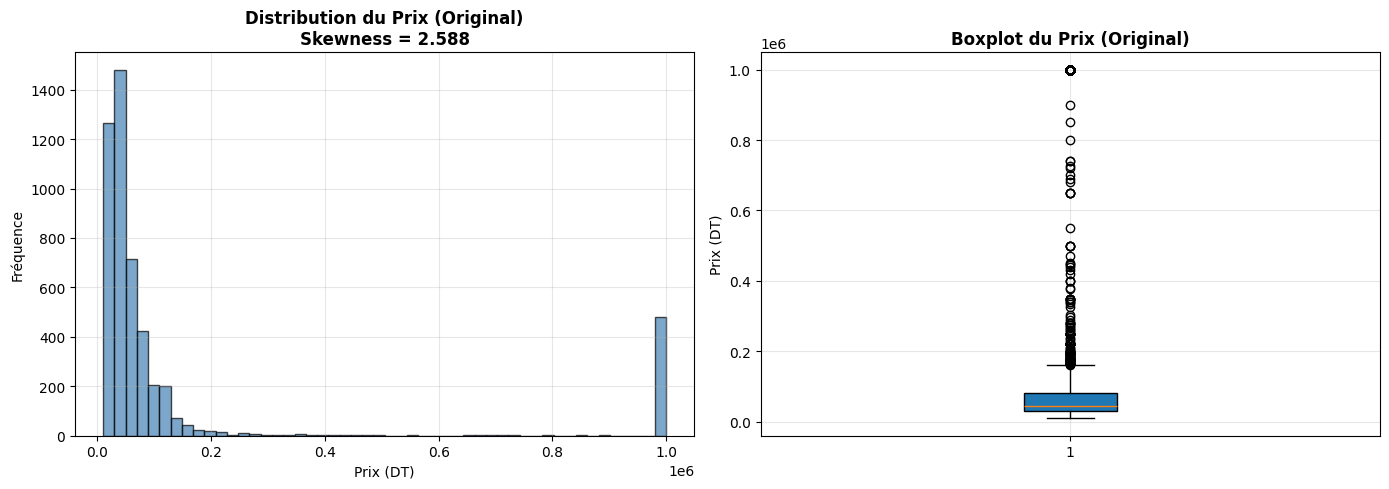


APPLICATION DE LA TRANSFORMATION LOGARITHMIQUE

✅ Colonne 'prix_log' créée avec np.log1p(prix)
📊 Skewness après transformation: 1.2845
📉 Réduction de l'asymétrie: 1.3040


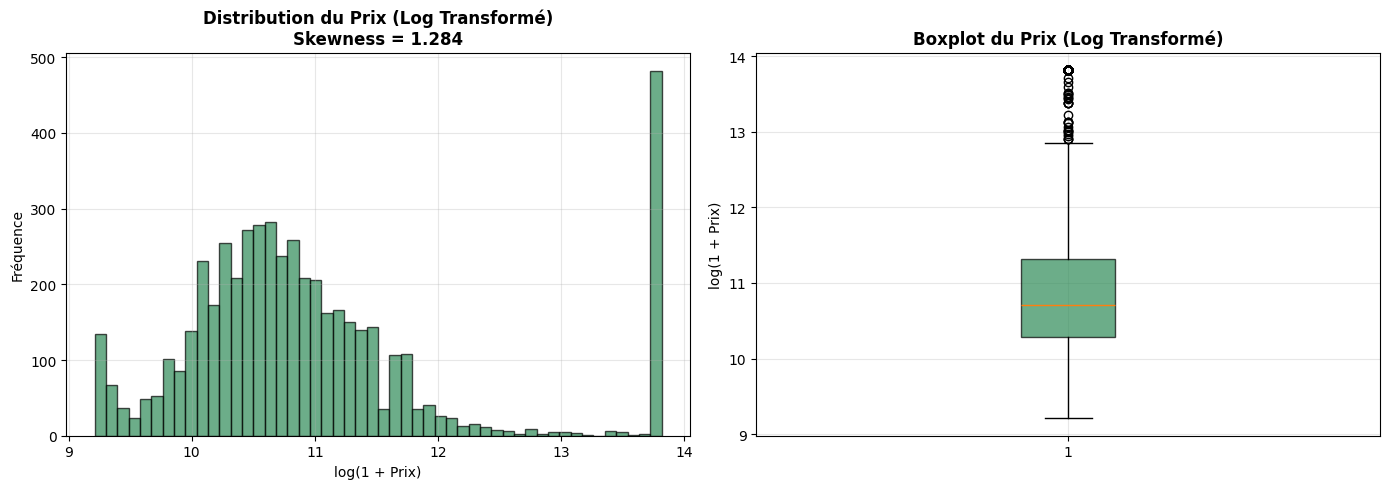


⚠️  IMPORTANT POUR LA MODÉLISATION:
--------------------------------------------------------------------------------
  1. Utiliser 'prix_log' comme variable cible (target) dans le modèle
  2. Après prédiction, reconvertir avec: prix_réel = np.expm1(prédictions)
  3. Formule inverse: np.expm1() est l'inverse de np.log1p()


In [138]:
# 📊 ANALYSE ET TRANSFORMATION LOGARITHMIQUE DU PRIX
print("="*80)
print("ANALYSE DE LA DISTRIBUTION DU PRIX")
print("="*80)

# 1. Statistiques descriptives
print("\n📈 Statistiques descriptives du prix (DT):")
print("-"*80)
print(df_copy['prix'].describe())

# 2. Vérifier l'asymétrie (skewness)
from scipy.stats import skew
prix_skewness = skew(df_copy['prix'].dropna())
print(f"\n📊 Skewness du prix: {prix_skewness:.4f}")
if prix_skewness > 1:
    print("  ⚠️  Distribution très asymétrique (fortement positif) → Transformation log recommandée")
elif prix_skewness > 0.5:
    print("  ⚠️  Distribution modérément asymétrique → Transformation log utile")
else:
    print("  ✓ Distribution relativement symétrique")

# 3. Visualisation AVANT transformation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogramme
axes[0].hist(df_copy['prix'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_title(f'Distribution du Prix (Original)\nSkewness = {prix_skewness:.3f}', fontweight='bold')
axes[0].set_xlabel('Prix (DT)')
axes[0].set_ylabel('Fréquence')
axes[0].grid(True, alpha=0.3)

# Boxplot
axes[1].boxplot(df_copy['prix'].dropna(), vert=True, patch_artist=True)
axes[1].set_title('Boxplot du Prix (Original)', fontweight='bold')
axes[1].set_ylabel('Prix (DT)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. APPLICATION DE LA TRANSFORMATION LOG
print("\n" + "="*80)
print("APPLICATION DE LA TRANSFORMATION LOGARITHMIQUE")
print("="*80)

# Créer une nouvelle colonne avec transformation log(1 + prix)
df_copy['prix_log'] = np.log1p(df_copy['prix'])

# Statistiques après transformation
prix_log_skewness = skew(df_copy['prix_log'].dropna())
print(f"\n✅ Colonne 'prix_log' créée avec np.log1p(prix)")
print(f"📊 Skewness après transformation: {prix_log_skewness:.4f}")
print(f"📉 Réduction de l'asymétrie: {prix_skewness - prix_log_skewness:.4f}")

# 5. Visualisation APRÈS transformation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogramme
axes[0].hist(df_copy['prix_log'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='seagreen')
axes[0].set_title(f'Distribution du Prix (Log Transformé)\nSkewness = {prix_log_skewness:.3f}', fontweight='bold')
axes[0].set_xlabel('log(1 + Prix)')
axes[0].set_ylabel('Fréquence')
axes[0].grid(True, alpha=0.3)

# Boxplot
axes[1].boxplot(df_copy['prix_log'].dropna(), vert=True, patch_artist=True, 
                boxprops=dict(facecolor='seagreen', alpha=0.7))
axes[1].set_title('Boxplot du Prix (Log Transformé)', fontweight='bold')
axes[1].set_ylabel('log(1 + Prix)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("⚠️  IMPORTANT POUR LA MODÉLISATION:")
print("-"*80)
print("  1. Utiliser 'prix_log' comme variable cible (target) dans le modèle")
print("  2. Après prédiction, reconvertir avec: prix_réel = np.expm1(prédictions)")
print("  3. Formule inverse: np.expm1() est l'inverse de np.log1p()")
print("="*80)

In [139]:
# ✅ ÉVALUATION DE LA QUALITÉ DE LA TRANSFORMATION LOG
print("="*80)
print("ÉVALUATION DE LA TRANSFORMATION LOGARITHMIQUE")
print("="*80)

# Résumé des résultats
print(f"\n📊 SKEWNESS (asymétrie):")
print("-"*80)
print(f"  AVANT transformation:  {prix_skewness:.4f}")
print(f"  APRÈS transformation:  {prix_log_skewness:.4f}")
print(f"  Amélioration:          {prix_skewness - prix_log_skewness:.4f}")

# Interprétation
print("\n🎯 INTERPRÉTATION:")
print("-"*80)

# Critères de qualité pour skewness
if abs(prix_log_skewness) < 0.5:
    qualite = "✅ EXCELLENTE"
    verdict = "Distribution quasi-normale, parfaite pour la régression linéaire"
elif abs(prix_log_skewness) < 1.0:
    qualite = "✅ BONNE"
    verdict = "Distribution acceptable, transformation réussie"
elif abs(prix_log_skewness) < 1.5:
    qualite = "⚠️ ACCEPTABLE"
    verdict = "Encore un peu asymétrique mais beaucoup mieux"
else:
    qualite = "❌ INSUFFISANTE"
    verdict = "Asymétrie encore trop élevée, peut nécessiter d'autres transformations"

print(f"  Qualité: {qualite}")
print(f"  Verdict: {verdict}")

# Comparaison des distributions
print("\n📈 COMPARAISON DES STATISTIQUES:")
print("-"*80)
print(f"\nPRIX ORIGINAL:")
print(f"  Min:     {df_copy['prix'].min():,.0f} DT")
print(f"  Médiane: {df_copy['prix'].median():,.0f} DT")
print(f"  Moyenne: {df_copy['prix'].mean():,.0f} DT")
print(f"  Max:     {df_copy['prix'].max():,.0f} DT")
print(f"  Écart-type: {df_copy['prix'].std():,.0f} DT")

print(f"\nPRIX LOG-TRANSFORMÉ:")
print(f"  Min:     {df_copy['prix_log'].min():.4f}")
print(f"  Médiane: {df_copy['prix_log'].median():.4f}")
print(f"  Moyenne: {df_copy['prix_log'].mean():.4f}")
print(f"  Max:     {df_copy['prix_log'].max():.4f}")
print(f"  Écart-type: {df_copy['prix_log'].std():.4f}")

print("\n" + "="*80)
print("🚀 RECOMMANDATION POUR LA MODÉLISATION:")
print("-"*80)
if abs(prix_log_skewness) < 1.0:
    print("  ✅ La transformation log est EFFICACE")
    print("  ✅ Utilisez 'prix_log' comme target dans votre modèle")
    print("  ✅ Attendez-vous à de MEILLEURS résultats qu'avec le prix original")
    print("  ⚠️  N'oubliez pas: prix_réel = np.expm1(prédictions_log)")
else:
    print("  ⚠️  La transformation aide mais n'est pas suffisante")
    print("  💡 Considérez aussi: Ridge/Lasso pour gérer la variance élevée")
print("="*80)

ÉVALUATION DE LA TRANSFORMATION LOGARITHMIQUE

📊 SKEWNESS (asymétrie):
--------------------------------------------------------------------------------
  AVANT transformation:  2.5884
  APRÈS transformation:  1.2845
  Amélioration:          1.3040

🎯 INTERPRÉTATION:
--------------------------------------------------------------------------------
  Qualité: ⚠️ ACCEPTABLE
  Verdict: Encore un peu asymétrique mais beaucoup mieux

📈 COMPARAISON DES STATISTIQUES:
--------------------------------------------------------------------------------

PRIX ORIGINAL:
  Min:     10,000 DT
  Médiane: 45,000 DT
  Moyenne: 147,617 DT
  Max:     1,000,000 DT
  Écart-type: 283,871 DT

PRIX LOG-TRANSFORMÉ:
  Min:     9.2104
  Médiane: 10.7144
  Moyenne: 10.9817
  Max:     13.8155
  Écart-type: 1.1348

🚀 RECOMMANDATION POUR LA MODÉLISATION:
--------------------------------------------------------------------------------
  ⚠️  La transformation aide mais n'est pas suffisante
  💡 Considérez aussi: Ridge/Lasso

In [140]:
# 💾 EXPORTATION DES DONNÉES NETTOYÉES EN CSV
print("="*80)
print("EXPORTATION DES DONNÉES EN CSV (avec prix_log)")
print("="*80)

# Nom du fichier de sortie
output_filename = "tayara_cars_cleaned.csv"

# Préparer le DataFrame pour l'export
print("\n🔄 Préparation des données:")
print("-"*80)
df_export = df_copy.copy()

# Remplacer 'prix' par 'prix_log'
if 'prix_log' in df_export.columns:
    df_export['prix'] = df_export['prix_log']
    df_export = df_export.drop('prix_log', axis=1)
    print("  ✅ Colonne 'prix' remplacée par 'prix_log'")
    print("  ✅ Colonne 'prix_log' supprimée (renommée en 'prix')")
else:
    print("  ⚠️  Colonne 'prix_log' introuvable, export du prix original")

# Informations avant export
print(f"\n📊 Informations sur les données à exporter:")
print("-"*80)
print(f"  Nombre de lignes: {len(df_export):,}")
print(f"  Nombre de colonnes: {len(df_export.columns)}")
print(f"\n  Colonnes: {list(df_export.columns)}")

# 💾 EXPORT EN CSV
print(f"\n📂 Exportation en cours...")
df_export.to_csv(output_filename, index=False)

# Vérification de l'export
import os
if os.path.exists(output_filename):
    file_size_bytes = os.path.getsize(output_filename)
    file_size_mb = file_size_bytes / (1024 * 1024)
    
    print("\n" + "="*80)
    print(f"✅ EXPORT CSV RÉUSSI!")
    print("-"*80)
    print(f"  📊 Contenu: {len(df_export):,} lignes × {len(df_export.columns)} colonnes")
    print(f"  📄 Fichier: {output_filename}")
    print(f"  📍 Chemin complet: {os.path.abspath(output_filename)}")
    print(f"  📦 Taille: {file_size_mb:.2f} MB ({file_size_bytes:,} bytes)")
    print(f"  🔢 La colonne 'prix' contient les valeurs log-transformées")
else:
    print(f"\n❌ ERREUR: Le fichier n'a pas été créé")

EXPORTATION DES DONNÉES EN CSV (avec prix_log)

🔄 Préparation des données:
--------------------------------------------------------------------------------
  ✅ Colonne 'prix' remplacée par 'prix_log'
  ✅ Colonne 'prix_log' supprimée (renommée en 'prix')

📊 Informations sur les données à exporter:
--------------------------------------------------------------------------------
  Nombre de lignes: 5,013
  Nombre de colonnes: 13

  Colonnes: ['prix', 'kilometrage', 'couleur_du_vehicule', 'etat_du_vehicule', 'boite', 'annee', 'cylindree', 'marque', 'modele', 'puissance_fiscale', 'type_de_carrosserie', 'carburant', 'kilometrage_log']

📂 Exportation en cours...

✅ EXPORT CSV RÉUSSI!
--------------------------------------------------------------------------------
  📊 Contenu: 5,013 lignes × 13 colonnes
  📄 Fichier: tayara_cars_cleaned.csv
  📍 Chemin complet: c:\Users\user\OneDrive - Ministere de l'Enseignement Superieur et de la Recherche Scientifique\Desktop\Predict_prix_voiture\projet_basse

In [141]:
# 💾 EXPORTATION DES DONNÉES NETTOYÉES EN JSON
print("="*80)
print("EXPORTATION DES DONNÉES EN JSON (avec prix_log)")
print("="*80)

# Nom du fichier de sortie
output_json = "tayara_cars_cleaned.json"

# Utiliser le même DataFrame préparé pour CSV
# (prix a déjà été remplacé par prix_log dans df_export)

# Informations avant export
print(f"\n📊 Informations sur les données à exporter:")
print("-"*80)
print(f"  Nombre d'enregistrements: {len(df_export):,}")
print(f"  Nombre de champs: {len(df_export.columns)}")
print(f"  🔢 La colonne 'prix' contient les valeurs log-transformées")

# Export en JSON (format records pour une meilleure lisibilité)
print(f"\n📂 Exportation en cours...")
df_export.to_json(output_json, orient='records', force_ascii=False, indent=2)

# Vérification de l'export
import os
if os.path.exists(output_json):
    file_size_bytes = os.path.getsize(output_json)
    file_size_mb = file_size_bytes / (1024 * 1024)
    
    print(f"\n✅ EXPORT JSON RÉUSSI!")
    print(f"  📊 Contenu: {len(df_export):,} enregistrements")
    print(f"  📄 Fichier: {output_json}")
    print(f"  🔢 La colonne 'prix' contient les valeurs log-transformées")
else:
    print(f"\n❌ ERREUR: Le fichier JSON n'a pas été créé")

print("\n" + "="*80)
print("📋 RÉSUMÉ DES EXPORTS:")
print("-"*80)
print("  ✅ CSV:  tayara_cars_cleaned.csv")
print("\n⚠️  IMPORTANT:")

print("  🔢 La colonne 'prix' dans les deux fichiers contient les valeurs LOG-TRANSFORMÉES")
print("="*80)
print("-"*80)
print("="*80)

print("  📐 Pour obtenir le prix réel: prix_réel = np.expm1(prix)")
print("  ✅ CSV:  tayara_cars_cleaned.csv")
print("="*80)

print("  🤖 Dans le modèle: utilisez directement 'prix' comme target (déjà transformé)")
print("  ✅ JSON: tayara_cars_cleaned.json")

EXPORTATION DES DONNÉES EN JSON (avec prix_log)

📊 Informations sur les données à exporter:
--------------------------------------------------------------------------------
  Nombre d'enregistrements: 5,013
  Nombre de champs: 13
  🔢 La colonne 'prix' contient les valeurs log-transformées

📂 Exportation en cours...

✅ EXPORT JSON RÉUSSI!
  📊 Contenu: 5,013 enregistrements
  📄 Fichier: tayara_cars_cleaned.json
  🔢 La colonne 'prix' contient les valeurs log-transformées

📋 RÉSUMÉ DES EXPORTS:
--------------------------------------------------------------------------------
  ✅ CSV:  tayara_cars_cleaned.csv

⚠️  IMPORTANT:
  🔢 La colonne 'prix' dans les deux fichiers contient les valeurs LOG-TRANSFORMÉES
--------------------------------------------------------------------------------
  📐 Pour obtenir le prix réel: prix_réel = np.expm1(prix)
  ✅ CSV:  tayara_cars_cleaned.csv
  🤖 Dans le modèle: utilisez directement 'prix' comme target (déjà transformé)
  ✅ JSON: tayara_cars_cleaned.json
